In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib
%matplotlib inline

In [2]:
def fun (t0,u0,tE,f_s):
    u = np.sqrt(u0**2+((dff['t']-t0)/tE)**2)
    A = ((u**2)+2)/(u*np.sqrt(u**2+4))
    return (f_s * (A-1)) +1

def fun2 (mean, sigma,amp, t0,u0,tE,f_s):
    u = np.sqrt(u0**2+((dff['t']-t0)/tE)**2)
    A = (((amp/np.sqrt(2*np.pi*(sigma**2)))*np.exp(-((dff['t']-mean)**2)/(2*(sigma**2)))))+((u**2)+2)/(u*np.sqrt((u**2)+4))
    return (f_s * (A-1)) +1

In [3]:
home = os.path.expanduser("~")

direc = os.listdir(".")

In [4]:
#!/usr/bin/env python
# Implementation of algorithm from https://stackoverflow.com/a/22640362/6029703
import numpy as np
import pylab

def thresholding_algo(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag):i])
            stdFilter[i] = np.std(filteredY[(i-lag):i])
        else:
#             print i
#             print abs(y[i] - avgFilter[i-1])
#             print threshold * stdFilter [i-1]
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag):i])
            stdFilter[i] = np.std(filteredY[(i-lag):i])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [5]:
name = 'alllc_full_info2.CSV'  
#Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/result_file/
tempdata = home+'/Desktop/trial_runs/'+str(name)
#&((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.5) & (df['u0_true']>0.1)
df = pd.read_csv(tempdata)

In [118]:
name = 'cassan_0_100_1920.det.lc.gz'  
tempdata = home+'/Library/Mobile Documents/com~apple~CloudDocs/project_microlensing/shared_lc/'+str(name) #'/Desktop/alllc1/'+str(name) #

t,f,f_err,f_true,code = np.loadtxt(tempdata,usecols=(0,1,2,3,5),unpack=True)
dfff = pd.DataFrame({'t':t , 'f':f , 'f_err' : f_err , 'f_true': f_true, 'code':code})
dfff = dfff[dfff['code']==4]
dfff = dfff.reset_index(drop=True)

t0_ml = float(df['t0_fitted'][df['name']==str(name)])
u0_ml = float(df['u0_fitted'][df['name']==str(name)])
tE_ml = float(df['tE_fitted'][df['name']==str(name)])
f_s_ml = float(df['f_s_fitted'][df['name']==str(name)])
tp_ml = float(df['tp_fitted'][df['name']==str(name)])
tEp_ml = float(df['tEp_fitted'][df['name']==str(name)])
ampl_ml = float(df['ampl_fitted'][df['name']==str(name)])

In [120]:
y = dfff['f']- fun2(tp_ml,tEp_ml,ampl_ml, t0_ml, u0_ml, tE_ml,f_s_ml )

In [6]:
lag = 30
threshold = 6
influence = 0

In [123]:
%matplotlib qt

# Run algo with settings from above
#y = smooth(y,19)
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)

# Plot result
pylab.subplot(211)
pylab.plot(np.arange(1, len(y)+1), y)

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"], color="cyan", lw=2)

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"] + threshold * result["stdFilter"], color="green", lw=2)

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"] - threshold * result["stdFilter"], color="green", lw=2)

pylab.subplot(212)
pylab.step(np.arange(1, len(y)+1), result["signals"], color="red", lw=2)
pylab.ylim(-1.5, 1.5)
#pylab.ylim(23000,26000)




(-1.5, 1.5)

In [124]:
subtr = np.asarray([result['signals'][i+1] - result['signals'][i] for i in range(len(result['signals'])-1)])
len(subtr[subtr>0])

1

# Checking the z_score method on all light curves to see if it manages to pick the double peaked ones

In [7]:
alllc1 = pd.read_csv(home+'/Desktop/alllc1/alllc1_info.CSV')
alllc2 = pd.read_csv(home+'/Desktop/alllc2/alllc2_info.CSV')

In [8]:
from tqdm import tqdm

dd_peak = []
for i in tqdm(range (len(df))):
    #print i
    #print df['name'][i]
    t0_ml = float(df['t0_fitted'][i])
    u0_ml = float(df['u0_fitted'][i])
    tE_ml = float(df['tE_fitted'][i])
    f_s_ml = float(df['f_s_fitted'][i])
    tp_ml = float(df['tp_fitted'][i])
    tEp_ml = float(df['tEp_fitted'][i])
    ampl_ml = float(df['ampl_fitted'][i])
    
    if df['name'][i] in np.asarray(alllc1['name']):
        t,f,f_err,f_true,code = np.loadtxt(home+'/Desktop/alllc1/'+str(df['name'][i]),usecols=(0,1,2,3,5),unpack=True)
        dff = pd.DataFrame({'t':t , 'f':f , 'f_err' : f_err , 'f_true': f_true, 'code':code})
        dff = dff[dff['code']==4]
        dff = dff.reset_index(drop=True)
    if df['name'][i] in np.asarray(alllc2['name']):
        t,f,f_err,f_true,code = np.loadtxt(home+'/Desktop/alllc2/'+str(df['name'][i]),usecols=(0,1,2,3,5),unpack=True)
        dff = pd.DataFrame({'t':t , 'f':f , 'f_err' : f_err , 'f_true': f_true, 'code':code})
        dff = dff[dff['code']==4]
        dff = dff.reset_index(drop=True)
        
    res = dff['f']-fun2(tp_ml,tEp_ml,ampl_ml, t0_ml, u0_ml, tE_ml,f_s_ml)
    #res = smooth(res,19)
    
    result = thresholding_algo(res, lag=lag, threshold=threshold, influence=influence)
    subtr = np.asarray([result['signals'][j+1] - result['signals'][j] for j in range(len(result['signals'])-1)])
    
    if len(subtr[(subtr)>0])>2:
        print df['name'][i]
        dd_peak.append(df['name'][i])

print 'done'

  0%|          | 0/13029 [00:00<?, ?it/s]/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
  0%|          | 46/13029 [03:19<15:39:38,  4.34s/it]

cassan_0_32_462.det.lc.gz


  0%|          | 56/13029 [04:11<16:12:32,  4.50s/it]

cassan_0_35_3024.det.lc.gz


  1%|          | 71/13029 [05:30<16:44:12,  4.65s/it]

cassan_0_45_2005.det.lc.gz


  1%|          | 77/13029 [06:00<16:50:16,  4.68s/it]

cassan_0_56_2386.det.lc.gz


  1%|          | 116/13029 [09:33<17:44:23,  4.95s/it]

cassan_0_87_479.det.lc.gz


  1%|          | 118/13029 [09:44<17:46:20,  4.96s/it]

cassan_0_87_852.det.lc.gz


  1%|          | 142/13029 [11:30<17:24:05,  4.86s/it]

cassan_10_112_3102.det.lc.gz


  1%|          | 148/13029 [11:56<17:19:10,  4.84s/it]

cassan_10_123_1709.det.lc.gz


  1%|          | 149/13029 [12:00<17:18:16,  4.84s/it]

cassan_10_124_2350.det.lc.gz


  1%|          | 153/13029 [12:17<17:14:23,  4.82s/it]

cassan_10_126_2434.det.lc.gz


  1%|▏         | 166/13029 [13:13<17:04:27,  4.78s/it]

cassan_10_140_526.det.lc.gz


  1%|▏         | 194/13029 [15:18<16:52:29,  4.73s/it]

cassan_10_46_1981.det.lc.gz


  2%|▏         | 198/13029 [15:35<16:50:44,  4.73s/it]

cassan_10_48_2836.det.lc.gz


  2%|▏         | 203/13029 [15:58<16:49:14,  4.72s/it]

cassan_10_50_658.det.lc.gz


  2%|▏         | 210/13029 [16:30<16:48:13,  4.72s/it]

cassan_10_5_925.det.lc.gz


  2%|▏         | 258/13029 [20:14<16:42:11,  4.71s/it]

cassan_10_97_2076.det.lc.gz


  2%|▏         | 269/13029 [21:07<16:41:43,  4.71s/it]

cassan_11_109_3018.det.lc.gz


  2%|▏         | 271/13029 [21:16<16:41:25,  4.71s/it]

cassan_11_10_358.det.lc.gz


  2%|▏         | 310/13029 [24:14<16:34:27,  4.69s/it]

cassan_11_20_1717.det.lc.gz


  3%|▎         | 343/13029 [26:45<16:29:50,  4.68s/it]

cassan_11_49_1488.det.lc.gz


  3%|▎         | 349/13029 [27:12<16:28:36,  4.68s/it]

cassan_11_57_2746.det.lc.gz


  3%|▎         | 369/13029 [28:44<16:25:50,  4.67s/it]

cassan_11_74_1053.det.lc.gz


  3%|▎         | 399/13029 [31:05<16:23:55,  4.67s/it]

cassan_11_96_1347.det.lc.gz


  3%|▎         | 401/13029 [31:13<16:23:23,  4.67s/it]

cassan_11_96_3057.det.lc.gz


  3%|▎         | 431/13029 [33:28<16:18:31,  4.66s/it]

cassan_12_113_2002.det.lc.gz


  3%|▎         | 455/13029 [35:20<16:16:30,  4.66s/it]

cassan_12_151_2395.det.lc.gz


  4%|▎         | 460/13029 [35:43<16:16:08,  4.66s/it]

cassan_12_22_452.det.lc.gz


  4%|▍         | 520/13029 [40:09<16:05:51,  4.63s/it]

cassan_12_74_2408.det.lc.gz


  4%|▍         | 522/13029 [40:17<16:05:22,  4.63s/it]

cassan_12_75_1792.det.lc.gz


  4%|▍         | 523/13029 [40:21<16:05:09,  4.63s/it]

cassan_12_75_2339.det.lc.gz


  4%|▍         | 525/13029 [40:30<16:04:44,  4.63s/it]

cassan_12_76_1629.det.lc.gz


  4%|▍         | 553/13029 [42:33<16:00:02,  4.62s/it]

cassan_12_8_2736.det.lc.gz


  4%|▍         | 560/13029 [43:02<15:58:25,  4.61s/it]

cassan_12_97_2188.det.lc.gz


  4%|▍         | 574/13029 [44:02<15:55:47,  4.60s/it]

cassan_13_112_1219.det.lc.gz


  5%|▍         | 603/13029 [46:11<15:51:46,  4.60s/it]

cassan_13_20_1471.det.lc.gz


  5%|▍         | 615/13029 [47:06<15:50:44,  4.60s/it]

cassan_13_22_1590.det.lc.gz


  5%|▍         | 620/13029 [47:28<15:50:16,  4.59s/it]

cassan_13_24_2337.det.lc.gz


  5%|▍         | 623/13029 [47:42<15:50:09,  4.60s/it]

cassan_13_31_828.det.lc.gz


  5%|▍         | 629/13029 [48:11<15:49:57,  4.60s/it]

cassan_13_33_1565.det.lc.gz


  5%|▍         | 635/13029 [48:37<15:49:09,  4.59s/it]

cassan_13_34_231.det.lc.gz


  5%|▍         | 645/13029 [49:27<15:49:33,  4.60s/it]

cassan_13_46_1640.det.lc.gz


  5%|▌         | 655/13029 [50:12<15:48:37,  4.60s/it]

cassan_13_61_241.det.lc.gz


  5%|▌         | 708/13029 [54:09<15:42:27,  4.59s/it]

cassan_14_109_785.det.lc.gz


  5%|▌         | 714/13029 [54:35<15:41:33,  4.59s/it]

cassan_14_114_250.det.lc.gz


  6%|▌         | 755/13029 [57:31<15:35:18,  4.57s/it]

cassan_14_33_1102.det.lc.gz


  6%|▌         | 773/13029 [58:58<15:35:00,  4.58s/it]

cassan_14_48_2694.det.lc.gz


  6%|▌         | 778/13029 [59:19<15:34:18,  4.58s/it]

cassan_14_4_89.det.lc.gz


  6%|▋         | 815/13029 [1:02:07<15:30:55,  4.57s/it]

cassan_14_84_2169.det.lc.gz


  7%|▋         | 877/13029 [1:06:31<15:21:43,  4.55s/it]

cassan_15_150_267.det.lc.gz


  7%|▋         | 934/13029 [1:10:39<15:15:06,  4.54s/it]

cassan_15_6_1465.det.lc.gz


  7%|▋         | 950/13029 [1:11:51<15:13:41,  4.54s/it]

cassan_15_74_2843.det.lc.gz


  7%|▋         | 975/13029 [1:13:41<15:11:04,  4.53s/it]

cassan_15_99_2017.det.lc.gz


  8%|▊         | 985/13029 [1:14:23<15:09:39,  4.53s/it]

cassan_16_111_574.det.lc.gz


  8%|▊         | 990/13029 [1:14:45<15:09:02,  4.53s/it]

cassan_16_115_2.det.lc.gz


  8%|▊         | 1055/13029 [1:19:37<15:03:37,  4.53s/it]

cassan_16_61_2392.det.lc.gz


  9%|▉         | 1155/13029 [1:26:49<14:52:33,  4.51s/it]

cassan_17_21_1100.det.lc.gz


  9%|▉         | 1183/13029 [1:28:50<14:49:39,  4.51s/it]

cassan_17_56_1800.det.lc.gz


  9%|▉         | 1207/13029 [1:30:32<14:46:48,  4.50s/it]

cassan_17_6_244.det.lc.gz


  9%|▉         | 1226/13029 [1:31:53<14:44:41,  4.50s/it]

cassan_17_84_292.det.lc.gz


  9%|▉         | 1233/13029 [1:32:22<14:43:48,  4.50s/it]

cassan_17_88_1560.det.lc.gz


  9%|▉         | 1234/13029 [1:32:27<14:43:40,  4.50s/it]

cassan_17_88_1562.det.lc.gz


 10%|▉         | 1238/13029 [1:32:46<14:43:36,  4.50s/it]

cassan_17_98_101.det.lc.gz


 10%|▉         | 1245/13029 [1:33:15<14:42:43,  4.49s/it]

cassan_18_100_3207.det.lc.gz


 10%|▉         | 1255/13029 [1:33:58<14:41:41,  4.49s/it]

cassan_18_110_2472.det.lc.gz


 10%|▉         | 1259/13029 [1:34:16<14:41:17,  4.49s/it]

cassan_18_114_1579.det.lc.gz


 10%|▉         | 1289/13029 [1:36:23<14:37:56,  4.49s/it]

cassan_18_20_1777.det.lc.gz


 10%|█         | 1321/13029 [1:38:40<14:34:37,  4.48s/it]

cassan_18_69_605.det.lc.gz


 10%|█         | 1324/13029 [1:38:53<14:34:17,  4.48s/it]

cassan_18_70_1880.det.lc.gz


 10%|█         | 1339/13029 [1:39:57<14:32:36,  4.48s/it]

cassan_18_86_2774.det.lc.gz


 10%|█         | 1355/13029 [1:41:04<14:30:52,  4.48s/it]

cassan_19_102_2635.det.lc.gz


 11%|█         | 1370/13029 [1:42:21<14:31:06,  4.48s/it]

cassan_19_114_126.det.lc.gz


 11%|█▏        | 1480/13029 [1:56:04<15:05:48,  4.71s/it]

cassan_19_85_1561.det.lc.gz


 11%|█▏        | 1482/13029 [1:56:18<15:06:11,  4.71s/it]

cassan_19_85_2276.det.lc.gz


 12%|█▏        | 1514/13029 [2:00:06<15:13:26,  4.76s/it]

cassan_1_112_2792.det.lc.gz


 12%|█▏        | 1518/13029 [2:00:35<15:14:24,  4.77s/it]

cassan_1_113_185.det.lc.gz


 12%|█▏        | 1561/13029 [2:05:40<15:23:15,  4.83s/it]

cassan_1_35_926.det.lc.gz


 12%|█▏        | 1589/13029 [2:09:07<15:29:37,  4.88s/it]

cassan_1_61_899.det.lc.gz


 12%|█▏        | 1622/13029 [2:12:54<15:34:39,  4.92s/it]

cassan_1_99_1439.det.lc.gz


 13%|█▎        | 1631/13029 [2:13:58<15:36:16,  4.93s/it]

cassan_20_10_1123.det.lc.gz


 13%|█▎        | 1633/13029 [2:14:10<15:36:21,  4.93s/it]

cassan_20_110_1602.det.lc.gz


 13%|█▎        | 1637/13029 [2:14:35<15:36:34,  4.93s/it]

cassan_20_111_2436.det.lc.gz


 13%|█▎        | 1640/13029 [2:14:53<15:36:45,  4.94s/it]

cassan_20_113_3268.det.lc.gz


 13%|█▎        | 1692/13029 [2:20:52<15:43:57,  5.00s/it]

cassan_20_36_2679.det.lc.gz


 13%|█▎        | 1726/13029 [2:24:54<15:48:56,  5.04s/it]

cassan_20_71_559.det.lc.gz


 13%|█▎        | 1730/13029 [2:25:25<15:49:49,  5.04s/it]

cassan_20_72_956.det.lc.gz


 13%|█▎        | 1733/13029 [2:25:48<15:50:25,  5.05s/it]

cassan_20_74_2416.det.lc.gz


 14%|█▍        | 1796/13029 [2:33:03<15:57:16,  5.11s/it]

cassan_21_125_1629.det.lc.gz


 14%|█▍        | 1828/13029 [2:36:15<15:57:25,  5.13s/it]

cassan_21_22_723.det.lc.gz


 14%|█▍        | 1850/13029 [2:38:25<15:57:20,  5.14s/it]

cassan_21_45_957.det.lc.gz


 15%|█▍        | 1905/13029 [2:44:51<16:02:39,  5.19s/it]

cassan_21_89_511.det.lc.gz


 15%|█▍        | 1913/13029 [2:45:44<16:03:05,  5.20s/it]

cassan_21_97_3116.det.lc.gz


 15%|█▍        | 1920/13029 [2:46:38<16:04:08,  5.21s/it]

cassan_21_99_1671.det.lc.gz


 15%|█▍        | 1933/13029 [2:48:08<16:05:11,  5.22s/it]

cassan_22_112_118.det.lc.gz


 15%|█▍        | 1939/13029 [2:48:50<16:05:39,  5.22s/it]

cassan_22_114_3084.det.lc.gz


 15%|█▍        | 1947/13029 [2:49:49<16:06:36,  5.23s/it]

cassan_22_126_558.det.lc.gz


 15%|█▍        | 1950/13029 [2:50:09<16:06:46,  5.24s/it]

cassan_22_136_937.det.lc.gz


 15%|█▌        | 1967/13029 [2:51:59<16:07:12,  5.25s/it]

cassan_22_18_979.det.lc.gz


 15%|█▌        | 1972/13029 [2:52:35<16:07:41,  5.25s/it]

cassan_22_30_1992.det.lc.gz


 15%|█▌        | 1974/13029 [2:52:47<16:07:38,  5.25s/it]

cassan_22_31_1485.det.lc.gz


 15%|█▌        | 1983/13029 [2:53:43<16:07:44,  5.26s/it]

cassan_22_34_2370.det.lc.gz


 15%|█▌        | 1994/13029 [2:55:01<16:08:37,  5.27s/it]

cassan_22_43_14.det.lc.gz


 15%|█▌        | 2003/13029 [2:56:03<16:09:11,  5.27s/it]

cassan_22_4_1119.det.lc.gz


 15%|█▌        | 2008/13029 [2:56:38<16:09:30,  5.28s/it]

cassan_22_57_2660.det.lc.gz


 15%|█▌        | 2018/13029 [2:57:42<16:09:38,  5.28s/it]

cassan_22_69_1923.det.lc.gz


 16%|█▌        | 2035/13029 [2:59:42<16:10:53,  5.30s/it]

cassan_22_83_3080.det.lc.gz


 16%|█▌        | 2039/13029 [3:00:11<16:11:12,  5.30s/it]

cassan_22_84_62.det.lc.gz


 16%|█▌        | 2101/13029 [3:07:53<16:17:16,  5.37s/it]

cassan_23_138_2564.det.lc.gz


 16%|█▋        | 2127/13029 [3:10:54<16:18:28,  5.39s/it]

cassan_23_33_1999.det.lc.gz


 17%|█▋        | 2160/13029 [3:15:09<16:21:59,  5.42s/it]

cassan_23_61_736.det.lc.gz


 17%|█▋        | 2215/13029 [3:20:00<16:16:27,  5.42s/it]

cassan_24_101_3247.det.lc.gz


 17%|█▋        | 2226/13029 [3:20:48<16:14:33,  5.41s/it]

cassan_24_112_2017.det.lc.gz


 17%|█▋        | 2235/13029 [3:21:26<16:12:51,  5.41s/it]

cassan_24_123_597.det.lc.gz


 17%|█▋        | 2248/13029 [3:22:23<16:10:38,  5.40s/it]

cassan_24_140_2840.det.lc.gz


 17%|█▋        | 2253/13029 [3:22:45<16:09:45,  5.40s/it]

cassan_24_17_1751.det.lc.gz


 17%|█▋        | 2256/13029 [3:22:57<16:09:12,  5.40s/it]

cassan_24_18_1379.det.lc.gz


 18%|█▊        | 2287/13029 [3:25:12<16:03:53,  5.38s/it]

cassan_24_44_30.det.lc.gz


 18%|█▊        | 2294/13029 [3:25:42<16:02:38,  5.38s/it]

cassan_24_47_3083.det.lc.gz


 18%|█▊        | 2306/13029 [3:26:34<16:00:35,  5.37s/it]

cassan_24_59_1799.det.lc.gz


 18%|█▊        | 2344/13029 [3:29:18<15:54:06,  5.36s/it]

cassan_24_87_145.det.lc.gz


 18%|█▊        | 2352/13029 [3:29:53<15:52:48,  5.35s/it]

cassan_24_98_274.det.lc.gz


 18%|█▊        | 2375/13029 [3:31:32<15:48:56,  5.34s/it]

cassan_25_115_420.det.lc.gz


 18%|█▊        | 2396/13029 [3:33:03<15:45:29,  5.34s/it]

cassan_25_151_1787.det.lc.gz


 19%|█▊        | 2418/13029 [3:34:38<15:41:53,  5.33s/it]

cassan_25_32_2270.det.lc.gz


 19%|█▉        | 2494/13029 [3:40:07<15:29:50,  5.30s/it]

cassan_25_8_2626.det.lc.gz


 19%|█▉        | 2522/13029 [3:42:08<15:25:28,  5.28s/it]

cassan_26_125_1907.det.lc.gz


 19%|█▉        | 2529/13029 [3:42:38<15:24:20,  5.28s/it]

cassan_26_136_1436.det.lc.gz


 20%|█▉        | 2542/13029 [3:43:35<15:22:24,  5.28s/it]

cassan_26_19_968.det.lc.gz


 20%|█▉        | 2544/13029 [3:43:43<15:22:05,  5.28s/it]

cassan_26_21_511.det.lc.gz


 20%|█▉        | 2557/13029 [3:44:40<15:20:07,  5.27s/it]

cassan_26_33_377.det.lc.gz


 20%|██        | 2642/13029 [3:50:50<15:07:32,  5.24s/it]

cassan_27_115_1501.det.lc.gz


 21%|██        | 2688/13029 [3:54:10<15:00:53,  5.23s/it]

cassan_27_37_1831.det.lc.gz


 21%|██        | 2690/13029 [3:54:18<15:00:35,  5.23s/it]

cassan_27_43_2061.det.lc.gz


 21%|██        | 2694/13029 [3:54:35<14:59:58,  5.22s/it]

cassan_27_46_2653.det.lc.gz


 21%|██        | 2719/13029 [3:56:25<14:56:28,  5.22s/it]

cassan_27_7_118.det.lc.gz


 21%|██        | 2722/13029 [3:56:37<14:56:00,  5.22s/it]

cassan_27_7_3102.det.lc.gz


 21%|██        | 2754/13029 [3:58:55<14:51:26,  5.21s/it]

cassan_28_100_2226.det.lc.gz


 21%|██▏       | 2773/13029 [4:00:17<14:48:45,  5.20s/it]

cassan_28_125_1573.det.lc.gz


 22%|██▏       | 2804/13029 [4:02:31<14:44:22,  5.19s/it]

cassan_28_30_2019.det.lc.gz


 22%|██▏       | 2841/13029 [4:05:10<14:39:14,  5.18s/it]

cassan_28_70_2107.det.lc.gz


 22%|██▏       | 2852/13029 [4:05:59<14:37:47,  5.18s/it]

cassan_28_82_1088.det.lc.gz


 22%|██▏       | 2856/13029 [4:06:16<14:37:14,  5.17s/it]

cassan_28_83_1935.det.lc.gz


 22%|██▏       | 2857/13029 [4:06:21<14:37:05,  5.17s/it]

cassan_28_83_2197.det.lc.gz


 22%|██▏       | 2858/13029 [4:06:25<14:36:57,  5.17s/it]

cassan_28_83_2859.det.lc.gz


 22%|██▏       | 2861/13029 [4:06:37<14:36:32,  5.17s/it]

cassan_28_84_3096.det.lc.gz


 22%|██▏       | 2864/13029 [4:06:50<14:36:06,  5.17s/it]

cassan_28_84_601.det.lc.gz


 22%|██▏       | 2878/13029 [4:07:52<14:34:16,  5.17s/it]

cassan_28_99_392.det.lc.gz


 22%|██▏       | 2885/13029 [4:08:23<14:33:23,  5.17s/it]

cassan_29_101_659.det.lc.gz


 22%|██▏       | 2911/13029 [4:10:16<14:29:55,  5.16s/it]

cassan_29_124_487.det.lc.gz


 22%|██▏       | 2917/13029 [4:10:42<14:29:05,  5.16s/it]

cassan_29_127_2628.det.lc.gz


 22%|██▏       | 2922/13029 [4:11:04<14:28:27,  5.16s/it]

cassan_29_136_426.det.lc.gz


 23%|██▎       | 2945/13029 [4:12:45<14:25:28,  5.15s/it]

cassan_29_30_3065.det.lc.gz


 23%|██▎       | 2979/13029 [4:15:13<14:21:02,  5.14s/it]

cassan_29_56_2187.det.lc.gz


 23%|██▎       | 2991/13029 [4:16:04<14:19:23,  5.14s/it]

cassan_29_6_1827.det.lc.gz


 23%|██▎       | 3006/13029 [4:17:16<14:17:51,  5.14s/it]

cassan_29_75_2505.det.lc.gz


 23%|██▎       | 3015/13029 [4:18:00<14:16:56,  5.13s/it]

cassan_29_87_2521.det.lc.gz


 23%|██▎       | 3019/13029 [4:18:17<14:16:25,  5.13s/it]

cassan_29_89_2428.det.lc.gz


 23%|██▎       | 3021/13029 [4:18:26<14:16:10,  5.13s/it]

cassan_29_8_582.det.lc.gz


 24%|██▎       | 3065/13029 [4:22:02<14:11:51,  5.13s/it]

cassan_2_126_2318.det.lc.gz


 24%|██▎       | 3083/13029 [4:23:21<14:09:35,  5.13s/it]

cassan_2_21_1136.det.lc.gz


 24%|██▍       | 3095/13029 [4:24:13<14:08:03,  5.12s/it]

cassan_2_37_2633.det.lc.gz


 24%|██▍       | 3115/13029 [4:25:44<14:05:45,  5.12s/it]

cassan_2_57_567.det.lc.gz


 24%|██▍       | 3130/13029 [4:26:50<14:03:55,  5.12s/it]

cassan_2_62_3173.det.lc.gz


 24%|██▍       | 3169/13029 [4:29:43<13:59:12,  5.11s/it]

cassan_30_102_650.det.lc.gz


 25%|██▍       | 3210/13029 [4:32:53<13:54:44,  5.10s/it]

cassan_30_21_2931.det.lc.gz


 25%|██▍       | 3233/13029 [4:34:39<13:52:12,  5.10s/it]

cassan_30_35_2949.det.lc.gz


 25%|██▍       | 3239/13029 [4:35:07<13:51:35,  5.10s/it]

cassan_30_37_3285.det.lc.gz


 25%|██▌       | 3276/13029 [4:38:05<13:47:55,  5.09s/it]

cassan_30_6_866.det.lc.gz


 25%|██▌       | 3286/13029 [4:38:50<13:46:45,  5.09s/it]

cassan_30_76_2727.det.lc.gz


 25%|██▌       | 3304/13029 [4:40:07<13:44:31,  5.09s/it]

cassan_30_87_19.det.lc.gz


 26%|██▌       | 3369/13029 [4:44:45<13:36:30,  5.07s/it]

cassan_31_34_1424.det.lc.gz


 26%|██▌       | 3371/13029 [4:44:54<13:36:14,  5.07s/it]

cassan_31_34_2988.det.lc.gz


 26%|██▌       | 3374/13029 [4:45:06<13:35:52,  5.07s/it]

cassan_31_35_1943.det.lc.gz


 26%|██▌       | 3386/13029 [4:46:04<13:34:41,  5.07s/it]

cassan_31_49_1552.det.lc.gz


 26%|██▌       | 3389/13029 [4:46:18<13:34:25,  5.07s/it]

cassan_31_56_1725.det.lc.gz


 26%|██▌       | 3407/13029 [4:47:46<13:32:42,  5.07s/it]

cassan_31_69_2178.det.lc.gz


 26%|██▌       | 3417/13029 [4:48:31<13:31:37,  5.07s/it]

cassan_31_71_735.det.lc.gz


 26%|██▌       | 3420/13029 [4:48:48<13:31:26,  5.07s/it]

cassan_31_73_3120.det.lc.gz


 26%|██▋       | 3441/13029 [4:50:18<13:28:54,  5.06s/it]

cassan_31_86_2319.det.lc.gz


 27%|██▋       | 3457/13029 [4:51:28<13:27:02,  5.06s/it]

cassan_31_9_2901.det.lc.gz


 27%|██▋       | 3498/13029 [4:54:37<13:22:46,  5.05s/it]

cassan_32_137_2389.det.lc.gz


 27%|██▋       | 3553/13029 [4:58:45<13:16:49,  5.05s/it]

cassan_3_109_2115.det.lc.gz


 27%|██▋       | 3561/13029 [4:59:19<13:15:51,  5.04s/it]

cassan_3_112_1719.det.lc.gz


 27%|██▋       | 3572/13029 [5:00:14<13:14:53,  5.04s/it]

cassan_3_114_2107.det.lc.gz


 27%|██▋       | 3578/13029 [5:00:41<13:14:14,  5.04s/it]

cassan_3_123_3256.det.lc.gz


 28%|██▊       | 3634/13029 [5:05:15<13:09:10,  5.04s/it]

cassan_32_6_909.det.lc.gz


 28%|██▊       | 3637/13029 [5:05:28<13:08:49,  5.04s/it]

cassan_32_72_3321.det.lc.gz


 28%|██▊       | 3643/13029 [5:05:55<13:08:11,  5.04s/it]

cassan_32_82_1088.det.lc.gz


 28%|██▊       | 3669/13029 [5:08:11<13:06:14,  5.04s/it]

cassan_32_97_394.det.lc.gz


 29%|██▊       | 3729/13029 [5:13:04<13:00:47,  5.04s/it]

cassan_33_151_3245.det.lc.gz


 29%|██▉       | 3784/13029 [5:17:01<12:54:33,  5.03s/it]

cassan_33_5_685.det.lc.gz


 29%|██▉       | 3820/13029 [5:19:35<12:50:26,  5.02s/it]

cassan_33_87_253.det.lc.gz


 29%|██▉       | 3833/13029 [5:20:30<12:48:57,  5.02s/it]

cassan_33_9_2525.det.lc.gz


 29%|██▉       | 3835/13029 [5:20:40<12:48:46,  5.02s/it]

cassan_34_100_2710.det.lc.gz


 30%|██▉       | 3889/13029 [5:24:29<12:42:37,  5.01s/it]

cassan_34_19_966.det.lc.gz


 30%|██▉       | 3892/13029 [5:24:42<12:42:17,  5.01s/it]

cassan_34_22_2654.det.lc.gz


 30%|██▉       | 3908/13029 [5:25:51<12:40:30,  5.00s/it]

cassan_34_44_1457.det.lc.gz


 30%|███       | 3912/13029 [5:26:08<12:40:05,  5.00s/it]

cassan_34_46_2018.det.lc.gz


 30%|███       | 3928/13029 [5:27:16<12:38:17,  5.00s/it]

cassan_34_59_35.det.lc.gz


 30%|███       | 3968/13029 [5:30:07<12:33:50,  4.99s/it]

cassan_34_87_654.det.lc.gz


 31%|███       | 3981/13029 [5:31:02<12:32:23,  4.99s/it]

cassan_35_101_1039.det.lc.gz


 31%|███       | 4007/13029 [5:32:53<12:29:31,  4.98s/it]

cassan_35_126_409.det.lc.gz


 31%|███       | 4028/13029 [5:34:23<12:27:13,  4.98s/it]

cassan_35_33_1778.det.lc.gz


 31%|███       | 4035/13029 [5:34:52<12:26:25,  4.98s/it]

cassan_35_44_1861.det.lc.gz


 31%|███       | 4039/13029 [5:35:10<12:26:02,  4.98s/it]

cassan_35_45_568.det.lc.gz


 31%|███       | 4060/13029 [5:36:44<12:23:54,  4.98s/it]

cassan_35_60_1634.det.lc.gz


 31%|███       | 4065/13029 [5:37:08<12:23:26,  4.98s/it]

cassan_35_62_1180.det.lc.gz


 31%|███▏      | 4081/13029 [5:38:23<12:21:58,  4.98s/it]

cassan_35_73_2303.det.lc.gz


 32%|███▏      | 4129/13029 [5:42:06<12:17:24,  4.97s/it]

cassan_36_111_710.det.lc.gz


 32%|███▏      | 4132/13029 [5:42:20<12:17:08,  4.97s/it]

cassan_36_112_36.det.lc.gz


 32%|███▏      | 4139/13029 [5:42:54<12:16:30,  4.97s/it]

cassan_36_123_2487.det.lc.gz


 32%|███▏      | 4149/13029 [5:43:40<12:15:34,  4.97s/it]

cassan_36_137_2667.det.lc.gz


 32%|███▏      | 4215/13029 [5:48:37<12:08:59,  4.96s/it]

cassan_36_57_228.det.lc.gz


 32%|███▏      | 4227/13029 [5:49:27<12:07:40,  4.96s/it]

cassan_36_63_955.det.lc.gz


 33%|███▎      | 4237/13029 [5:50:10<12:06:37,  4.96s/it]

cassan_36_70_2453.det.lc.gz


 33%|███▎      | 4265/13029 [5:52:09<12:03:37,  4.95s/it]

cassan_36_88_95.det.lc.gz


 33%|███▎      | 4322/13029 [5:56:11<11:57:35,  4.94s/it]

cassan_37_138_1916.det.lc.gz


 34%|███▎      | 4380/13029 [6:00:20<11:51:32,  4.94s/it]

cassan_37_59_1590.det.lc.gz


 34%|███▍      | 4442/13029 [6:04:44<11:45:05,  4.93s/it]

cassan_38_111_1850.det.lc.gz


 34%|███▍      | 4479/13029 [6:07:22<11:41:17,  4.92s/it]

cassan_38_150_645.det.lc.gz


 34%|███▍      | 4488/13029 [6:08:01<11:40:22,  4.92s/it]

cassan_38_21_3118.det.lc.gz


 34%|███▍      | 4490/13029 [6:08:10<11:40:10,  4.92s/it]

cassan_38_23_979.det.lc.gz


 35%|███▍      | 4510/13029 [6:09:34<11:38:05,  4.92s/it]

cassan_38_44_2254.det.lc.gz


 35%|███▍      | 4520/13029 [6:10:17<11:37:04,  4.92s/it]

cassan_38_4_668.det.lc.gz


 35%|███▍      | 4527/13029 [6:10:46<11:36:20,  4.91s/it]

cassan_38_59_918.det.lc.gz


 35%|███▍      | 4560/13029 [6:13:06<11:32:56,  4.91s/it]

cassan_38_89_2806.det.lc.gz


 35%|███▌      | 4586/13029 [6:14:57<11:30:18,  4.91s/it]

cassan_39_10_266.det.lc.gz


 35%|███▌      | 4619/13029 [6:17:19<11:27:01,  4.90s/it]

cassan_39_150_1331.det.lc.gz


 36%|███▌      | 4632/13029 [6:18:15<11:25:42,  4.90s/it]

cassan_39_22_1724.det.lc.gz


 36%|███▌      | 4643/13029 [6:19:02<11:24:35,  4.90s/it]

cassan_39_32_779.det.lc.gz


 36%|███▌      | 4660/13029 [6:20:14<11:22:53,  4.90s/it]

cassan_39_47_2998.det.lc.gz


 36%|███▌      | 4661/13029 [6:20:18<11:22:46,  4.90s/it]

cassan_39_47_3117.det.lc.gz


 36%|███▌      | 4685/13029 [6:22:03<11:20:26,  4.89s/it]

cassan_39_70_2862.det.lc.gz


 36%|███▌      | 4690/13029 [6:22:24<11:19:55,  4.89s/it]

cassan_39_72_1191.det.lc.gz


 36%|███▌      | 4696/13029 [6:22:49<11:19:18,  4.89s/it]

cassan_39_7_3070.det.lc.gz


 36%|███▌      | 4716/13029 [6:24:15<11:17:19,  4.89s/it]

cassan_3_32_1106.det.lc.gz


 36%|███▌      | 4720/13029 [6:24:31<11:16:54,  4.89s/it]

cassan_3_35_1704.det.lc.gz


 36%|███▌      | 4722/13029 [6:24:40<11:16:43,  4.89s/it]

cassan_3_36_2788.det.lc.gz


 36%|███▋      | 4725/13029 [6:24:53<11:16:25,  4.89s/it]

cassan_3_43_2628.det.lc.gz


 36%|███▋      | 4732/13029 [6:25:23<11:15:44,  4.89s/it]

cassan_3_48_2704.det.lc.gz


 36%|███▋      | 4733/13029 [6:25:27<11:15:37,  4.89s/it]

cassan_3_48_3198.det.lc.gz


 36%|███▋      | 4738/13029 [6:25:48<11:15:07,  4.89s/it]

cassan_3_59_2031.det.lc.gz


 37%|███▋      | 4773/13029 [6:28:17<11:11:39,  4.88s/it]

cassan_3_89_1446.det.lc.gz


 37%|███▋      | 4774/13029 [6:28:22<11:11:34,  4.88s/it]

cassan_3_89_1791.det.lc.gz


 37%|███▋      | 4778/13029 [6:28:39<11:11:09,  4.88s/it]

cassan_3_96_2789.det.lc.gz


 37%|███▋      | 4785/13029 [6:29:09<11:10:28,  4.88s/it]

cassan_3_9_1677.det.lc.gz


 37%|███▋      | 4799/13029 [6:30:08<11:09:04,  4.88s/it]

cassan_40_109_2208.det.lc.gz


 37%|███▋      | 4823/13029 [6:31:51<11:06:42,  4.87s/it]

cassan_40_136_914.det.lc.gz


 37%|███▋      | 4825/13029 [6:31:59<11:06:31,  4.87s/it]

cassan_40_138_614.det.lc.gz


 37%|███▋      | 4833/13029 [6:32:34<11:05:44,  4.87s/it]

cassan_40_20_1313.det.lc.gz


 37%|███▋      | 4850/13029 [6:33:46<11:04:03,  4.87s/it]

cassan_40_35_3049.det.lc.gz


 37%|███▋      | 4863/13029 [6:34:40<11:02:45,  4.87s/it]

cassan_40_49_1225.det.lc.gz


 37%|███▋      | 4871/13029 [6:35:15<11:01:58,  4.87s/it]

cassan_40_57_511.det.lc.gz


 38%|███▊      | 4890/13029 [6:36:36<11:00:07,  4.87s/it]

cassan_40_70_2796.det.lc.gz


 38%|███▊      | 4912/13029 [6:38:09<10:57:57,  4.86s/it]

cassan_40_83_910.det.lc.gz


 38%|███▊      | 4916/13029 [6:38:27<10:57:35,  4.86s/it]

cassan_40_89_2921.det.lc.gz


 38%|███▊      | 4932/13029 [6:39:36<10:56:02,  4.86s/it]

cassan_41_10_395.det.lc.gz


 38%|███▊      | 4940/13029 [6:40:10<10:55:16,  4.86s/it]

cassan_41_115_2051.det.lc.gz


 38%|███▊      | 4947/13029 [6:40:40<10:54:36,  4.86s/it]

cassan_41_126_586.det.lc.gz


 38%|███▊      | 4949/13029 [6:40:49<10:54:24,  4.86s/it]

cassan_41_137_1271.det.lc.gz


 38%|███▊      | 4990/13029 [6:43:44<10:50:25,  4.85s/it]

cassan_41_34_81.det.lc.gz


 38%|███▊      | 4993/13029 [6:43:57<10:50:08,  4.85s/it]

cassan_41_44_1315.det.lc.gz


 38%|███▊      | 5002/13029 [6:44:35<10:49:15,  4.85s/it]

cassan_41_56_2269.det.lc.gz


 39%|███▊      | 5029/13029 [6:46:35<10:46:47,  4.85s/it]

cassan_41_87_1914.det.lc.gz


 39%|███▊      | 5035/13029 [6:47:02<10:46:14,  4.85s/it]

cassan_41_8_2606.det.lc.gz


 39%|███▉      | 5064/13029 [6:49:07<10:43:29,  4.85s/it]

cassan_42_124_3107.det.lc.gz


 39%|███▉      | 5117/13029 [6:52:56<10:38:29,  4.84s/it]

cassan_42_47_2428.det.lc.gz


 39%|███▉      | 5144/13029 [6:54:56<10:36:03,  4.84s/it]

cassan_42_69_1839.det.lc.gz


 40%|███▉      | 5166/13029 [6:56:35<10:34:05,  4.84s/it]

cassan_42_84_440.det.lc.gz


 40%|███▉      | 5176/13029 [6:57:17<10:33:07,  4.84s/it]

cassan_42_8_606.det.lc.gz


 40%|███▉      | 5178/13029 [6:57:26<10:32:55,  4.84s/it]

cassan_42_97_3255.det.lc.gz


 40%|███▉      | 5184/13029 [6:57:52<10:32:22,  4.84s/it]

cassan_43_101_1757.det.lc.gz


 40%|███▉      | 5186/13029 [6:58:00<10:32:10,  4.84s/it]

cassan_43_102_1096.det.lc.gz


 40%|███▉      | 5199/13029 [6:58:56<10:30:57,  4.83s/it]

cassan_43_114_581.det.lc.gz


 40%|████      | 5254/13029 [7:02:51<10:25:45,  4.83s/it]

cassan_43_46_2902.det.lc.gz


 40%|████      | 5262/13029 [7:03:25<10:24:59,  4.83s/it]

cassan_43_49_917.det.lc.gz


 41%|████      | 5307/13029 [7:06:37<10:20:46,  4.82s/it]

cassan_43_76_1064.det.lc.gz


 41%|████      | 5312/13029 [7:06:59<10:20:18,  4.82s/it]

cassan_43_7_2910.det.lc.gz


 41%|████      | 5343/13029 [7:09:11<10:17:24,  4.82s/it]

cassan_44_109_1108.det.lc.gz


 41%|████      | 5356/13029 [7:10:08<10:16:13,  4.82s/it]

cassan_44_114_2488.det.lc.gz


 42%|████▏     | 5454/13029 [7:17:15<10:07:17,  4.81s/it]

cassan_44_75_930.det.lc.gz


 42%|████▏     | 5455/13029 [7:17:19<10:07:12,  4.81s/it]

cassan_44_76_1201.det.lc.gz


 42%|████▏     | 5468/13029 [7:18:16<10:06:02,  4.81s/it]

cassan_44_88_2608.det.lc.gz


 42%|████▏     | 5495/13029 [7:20:17<10:03:39,  4.81s/it]

cassan_45_113_852.det.lc.gz


 42%|████▏     | 5525/13029 [7:22:31<10:01:01,  4.81s/it]

cassan_45_18_1106.det.lc.gz


 43%|████▎     | 5538/13029 [7:23:26<9:59:48,  4.80s/it]

cassan_45_23_2761.det.lc.gz


 43%|████▎     | 5573/13029 [7:25:54<9:56:34,  4.80s/it]

cassan_45_58_2250.det.lc.gz


 43%|████▎     | 5581/13029 [7:26:30<9:55:52,  4.80s/it]

cassan_45_62_885.det.lc.gz


 43%|████▎     | 5631/13029 [7:30:04<9:51:18,  4.80s/it]

cassan_46_111_762.det.lc.gz


 43%|████▎     | 5636/13029 [7:30:26<9:50:52,  4.80s/it]

cassan_46_113_697.det.lc.gz


 43%|████▎     | 5650/13029 [7:31:25<9:49:34,  4.79s/it]

cassan_46_127_1794.det.lc.gz


 44%|████▍     | 5704/13029 [7:35:18<9:44:42,  4.79s/it]

cassan_46_46_2231.det.lc.gz


 44%|████▍     | 5717/13029 [7:36:14<9:43:32,  4.79s/it]

cassan_46_58_3231.det.lc.gz


 44%|████▍     | 5719/13029 [7:36:23<9:43:21,  4.79s/it]

cassan_46_5_1089.det.lc.gz


 44%|████▍     | 5726/13029 [7:36:52<9:42:42,  4.79s/it]

cassan_46_61_2025.det.lc.gz


 44%|████▍     | 5744/13029 [7:38:09<9:41:04,  4.79s/it]

cassan_46_76_2902.det.lc.gz


 44%|████▍     | 5754/13029 [7:38:55<9:40:13,  4.79s/it]

cassan_46_84_521.det.lc.gz


 44%|████▍     | 5757/13029 [7:39:08<9:39:58,  4.79s/it]

cassan_46_85_2585.det.lc.gz


 44%|████▍     | 5770/13029 [7:40:05<9:38:49,  4.78s/it]

cassan_46_98_913.det.lc.gz


 44%|████▍     | 5781/13029 [7:40:53<9:37:50,  4.78s/it]

cassan_47_10_3223.det.lc.gz


 45%|████▍     | 5802/13029 [7:42:25<9:35:59,  4.78s/it]

cassan_47_139_3138.det.lc.gz


 45%|████▍     | 5805/13029 [7:42:37<9:35:43,  4.78s/it]

cassan_47_151_3309.det.lc.gz


 45%|████▍     | 5817/13029 [7:43:32<9:34:41,  4.78s/it]

cassan_47_21_1013.det.lc.gz


 45%|████▍     | 5848/13029 [7:45:51<9:32:03,  4.78s/it]

cassan_47_4_224.det.lc.gz


 45%|████▌     | 5877/13029 [7:47:56<9:29:27,  4.78s/it]

cassan_47_69_2627.det.lc.gz


 45%|████▌     | 5884/13029 [7:48:27<9:28:51,  4.78s/it]

cassan_47_71_203.det.lc.gz


 45%|████▌     | 5897/13029 [7:49:24<9:27:42,  4.78s/it]

cassan_47_83_1654.det.lc.gz


 45%|████▌     | 5913/13029 [7:50:36<9:26:21,  4.78s/it]

cassan_47_8_3302.det.lc.gz


 45%|████▌     | 5916/13029 [7:50:49<9:26:05,  4.78s/it]

cassan_47_96_380.det.lc.gz


 46%|████▌     | 5955/13029 [7:53:43<9:22:44,  4.77s/it]

cassan_48_139_25.det.lc.gz


 46%|████▌     | 5963/13029 [7:54:18<9:22:03,  4.77s/it]

cassan_48_17_779.det.lc.gz


 46%|████▌     | 5969/13029 [7:54:45<9:21:31,  4.77s/it]

cassan_48_19_2772.det.lc.gz


 46%|████▌     | 5982/13029 [7:55:46<9:20:28,  4.77s/it]

cassan_48_32_1344.det.lc.gz


 46%|████▌     | 6001/13029 [7:57:14<9:18:54,  4.77s/it]

cassan_48_4_782.det.lc.gz


 46%|████▌     | 6007/13029 [7:57:41<9:18:24,  4.77s/it]

cassan_48_56_831.det.lc.gz


 46%|████▌     | 6012/13029 [7:58:05<9:18:00,  4.77s/it]

cassan_48_61_1096.det.lc.gz


 46%|████▋     | 6030/13029 [7:59:22<9:16:25,  4.77s/it]

cassan_48_83_451.det.lc.gz


 47%|████▋     | 6060/13029 [8:01:31<9:13:45,  4.77s/it]

cassan_49_113_1312.det.lc.gz


 47%|████▋     | 6065/13029 [8:01:54<9:13:19,  4.77s/it]

cassan_49_124_923.det.lc.gz


 47%|████▋     | 6069/13029 [8:02:10<9:12:58,  4.77s/it]

cassan_49_127_1453.det.lc.gz


 47%|████▋     | 6075/13029 [8:02:35<9:12:25,  4.77s/it]

cassan_49_139_2775.det.lc.gz


 47%|████▋     | 6077/13029 [8:02:44<9:12:14,  4.77s/it]

cassan_49_140_1842.det.lc.gz


 47%|████▋     | 6116/13029 [8:05:32<9:08:49,  4.76s/it]

cassan_49_45_1644.det.lc.gz


 47%|████▋     | 6150/13029 [8:07:58<9:05:48,  4.76s/it]

cassan_49_70_14.det.lc.gz


 48%|████▊     | 6202/13029 [8:11:42<9:01:15,  4.76s/it]

cassan_4_112_1179.det.lc.gz


 48%|████▊     | 6286/13029 [8:17:44<8:53:55,  4.75s/it]

cassan_4_60_1585.det.lc.gz


 49%|████▊     | 6326/13029 [8:20:36<8:50:26,  4.75s/it]

cassan_4_96_1253.det.lc.gz


 49%|████▊     | 6334/13029 [8:21:10<8:49:43,  4.75s/it]

cassan_4_9_996.det.lc.gz


 49%|████▊     | 6347/13029 [8:22:06<8:48:36,  4.75s/it]

cassan_50_126_2558.det.lc.gz


 49%|████▉     | 6400/13029 [8:25:55<8:44:01,  4.74s/it]

cassan_50_50_958.det.lc.gz


 49%|████▉     | 6432/13029 [8:28:12<8:41:14,  4.74s/it]

cassan_50_84_1630.det.lc.gz


 49%|████▉     | 6448/13029 [8:29:20<8:39:50,  4.74s/it]

cassan_50_8_1986.det.lc.gz


 50%|████▉     | 6451/13029 [8:29:33<8:39:35,  4.74s/it]

cassan_50_96_1015.det.lc.gz


 50%|████▉     | 6457/13029 [8:29:59<8:39:04,  4.74s/it]

cassan_50_98_701.det.lc.gz


 50%|████▉     | 6487/13029 [8:32:07<8:36:28,  4.74s/it]

cassan_51_34_2663.det.lc.gz


 50%|████▉     | 6501/13029 [8:33:07<8:35:15,  4.74s/it]

cassan_51_49_634.det.lc.gz


 50%|████▉     | 6505/13029 [8:33:25<8:34:55,  4.74s/it]

cassan_51_56_2214.det.lc.gz


 50%|█████     | 6527/13029 [8:35:00<8:33:02,  4.73s/it]

cassan_51_71_1318.det.lc.gz


 50%|█████     | 6536/13029 [8:35:38<8:32:15,  4.73s/it]

cassan_51_75_1540.det.lc.gz


 50%|█████     | 6542/13029 [8:36:05<8:31:44,  4.73s/it]

cassan_51_83_1192.det.lc.gz


 50%|█████     | 6543/13029 [8:36:09<8:31:39,  4.73s/it]

cassan_51_83_1629.det.lc.gz


 50%|█████     | 6574/13029 [8:38:22<8:28:59,  4.73s/it]

cassan_5_110_3107.det.lc.gz


 50%|█████     | 6579/13029 [8:38:44<8:28:34,  4.73s/it]

cassan_5_113_2181.det.lc.gz


 51%|█████     | 6610/13029 [8:40:58<8:25:55,  4.73s/it]

cassan_5_19_939.det.lc.gz


 51%|█████     | 6617/13029 [8:41:28<8:25:18,  4.73s/it]

cassan_5_23_1806.det.lc.gz


 51%|█████     | 6621/13029 [8:41:46<8:24:59,  4.73s/it]

cassan_5_30_1599.det.lc.gz


 51%|█████     | 6649/13029 [8:43:46<8:22:34,  4.73s/it]

cassan_5_4_2952.det.lc.gz


 51%|█████▏    | 6679/13029 [8:45:56<8:20:02,  4.72s/it]

cassan_5_73_1003.det.lc.gz


 52%|█████▏    | 6712/13029 [8:48:18<8:17:13,  4.72s/it]

cassan_6_109_2033.det.lc.gz


 52%|█████▏    | 6731/13029 [8:49:40<8:15:36,  4.72s/it]

cassan_6_136_2878.det.lc.gz


 52%|█████▏    | 6732/13029 [8:49:45<8:15:31,  4.72s/it]

cassan_6_136_597.det.lc.gz


 52%|█████▏    | 6745/13029 [8:50:41<8:14:25,  4.72s/it]

cassan_6_19_20.det.lc.gz


 52%|█████▏    | 6801/13029 [8:54:42<8:09:39,  4.72s/it]

cassan_6_58_2833.det.lc.gz


 52%|█████▏    | 6805/13029 [8:54:59<8:09:18,  4.72s/it]

cassan_6_59_875.det.lc.gz


 53%|█████▎    | 6849/13029 [8:58:08<8:05:34,  4.71s/it]

cassan_7_102_423.det.lc.gz


 53%|█████▎    | 6917/13029 [9:03:04<7:59:52,  4.71s/it]

cassan_7_57_624.det.lc.gz


 53%|█████▎    | 6938/13029 [9:04:34<7:58:05,  4.71s/it]

cassan_7_71_72.det.lc.gz


 53%|█████▎    | 6949/13029 [9:05:21<7:57:09,  4.71s/it]

cassan_7_82_1763.det.lc.gz


 53%|█████▎    | 6961/13029 [9:06:13<7:56:09,  4.71s/it]

cassan_7_88_2672.det.lc.gz


 54%|█████▎    | 6988/13029 [9:08:11<7:53:53,  4.71s/it]

cassan_8_109_3312.det.lc.gz


 54%|█████▍    | 7010/13029 [9:09:45<7:52:02,  4.71s/it]

cassan_8_139_1668.det.lc.gz


 54%|█████▍    | 7040/13029 [9:11:54<7:49:30,  4.70s/it]

cassan_8_37_1173.det.lc.gz


 54%|█████▍    | 7067/13029 [9:13:50<7:47:14,  4.70s/it]

cassan_8_60_2897.det.lc.gz


 55%|█████▍    | 7164/13029 [9:20:50<7:39:08,  4.70s/it]

cassan_9_136_829.det.lc.gz


 55%|█████▌    | 7185/13029 [9:22:20<7:37:23,  4.70s/it]

cassan_9_31_1992.det.lc.gz


 55%|█████▌    | 7210/13029 [9:24:08<7:35:17,  4.69s/it]

cassan_9_57_509.det.lc.gz


 56%|█████▌    | 7233/13029 [9:25:48<7:33:23,  4.69s/it]

cassan_9_7_1779.det.lc.gz


 56%|█████▌    | 7242/13029 [9:26:26<7:32:38,  4.69s/it]

cassan_9_85_168.det.lc.gz


 56%|█████▌    | 7243/13029 [9:26:30<7:32:33,  4.69s/it]

cassan_9_85_1888.det.lc.gz


 56%|█████▌    | 7250/13029 [9:27:02<7:31:59,  4.69s/it]

cassan_9_87_2574.det.lc.gz


 56%|█████▌    | 7251/13029 [9:27:06<7:31:54,  4.69s/it]

cassan_9_87_404.det.lc.gz


 56%|█████▌    | 7268/13029 [9:28:20<7:30:29,  4.69s/it]

cassan_0_110_2001.det.lc.gz


 56%|█████▌    | 7302/13029 [9:30:46<7:27:39,  4.69s/it]

cassan_0_32_1164.det.lc.gz


 56%|█████▋    | 7332/13029 [9:32:54<7:25:09,  4.69s/it]

cassan_0_59_2892.det.lc.gz


 56%|█████▋    | 7341/13029 [9:33:34<7:24:25,  4.69s/it]

cassan_0_6_2047.det.lc.gz


 56%|█████▋    | 7342/13029 [9:33:38<7:24:20,  4.69s/it]

cassan_0_6_2497.det.lc.gz


 56%|█████▋    | 7343/13029 [9:33:43<7:24:15,  4.69s/it]

cassan_0_6_2640.det.lc.gz


 56%|█████▋    | 7347/13029 [9:34:00<7:23:55,  4.69s/it]

cassan_0_72_602.det.lc.gz


 56%|█████▋    | 7350/13029 [9:34:12<7:23:39,  4.69s/it]

cassan_0_75_1892.det.lc.gz


 57%|█████▋    | 7379/13029 [9:36:19<7:21:16,  4.69s/it]

cassan_0_98_2279.det.lc.gz


 57%|█████▋    | 7381/13029 [9:36:27<7:21:06,  4.69s/it]

cassan_0_9_1004.det.lc.gz


 57%|█████▋    | 7383/13029 [9:36:36<7:20:56,  4.69s/it]

cassan_10_100_2641.det.lc.gz


 57%|█████▋    | 7426/13029 [9:39:41<7:17:23,  4.68s/it]

cassan_10_31_3018.det.lc.gz


 57%|█████▋    | 7468/13029 [9:42:42<7:13:54,  4.68s/it]

cassan_10_74_1234.det.lc.gz


 58%|█████▊    | 7493/13029 [9:44:30<7:11:50,  4.68s/it]

cassan_10_9_2732.det.lc.gz


 58%|█████▊    | 7500/13029 [9:44:59<7:11:15,  4.68s/it]

cassan_11_102_2629.det.lc.gz


 58%|█████▊    | 7502/13029 [9:45:08<7:11:05,  4.68s/it]

cassan_11_111_1597.det.lc.gz


 58%|█████▊    | 7507/13029 [9:45:31<7:10:42,  4.68s/it]

cassan_11_114_151.det.lc.gz


 58%|█████▊    | 7512/13029 [9:45:52<7:10:16,  4.68s/it]

cassan_11_124_2212.det.lc.gz


 58%|█████▊    | 7514/13029 [9:46:00<7:10:06,  4.68s/it]

cassan_11_136_2595.det.lc.gz


 58%|█████▊    | 7518/13029 [9:46:18<7:09:46,  4.68s/it]

cassan_11_137_1415.det.lc.gz


 58%|█████▊    | 7524/13029 [9:46:45<7:09:18,  4.68s/it]

cassan_11_140_1140.det.lc.gz


 58%|█████▊    | 7525/13029 [9:46:49<7:09:13,  4.68s/it]

cassan_11_140_3006.det.lc.gz


 58%|█████▊    | 7542/13029 [9:48:02<7:07:49,  4.68s/it]

cassan_11_32_2169.det.lc.gz


 58%|█████▊    | 7546/13029 [9:48:19<7:07:29,  4.68s/it]

cassan_11_35_903.det.lc.gz


 58%|█████▊    | 7555/13029 [9:48:58<7:06:44,  4.68s/it]

cassan_11_47_880.det.lc.gz


 58%|█████▊    | 7570/13029 [9:50:02<7:05:30,  4.68s/it]

cassan_11_61_1395.det.lc.gz


 59%|█████▊    | 7624/13029 [9:53:54<7:01:03,  4.67s/it]

cassan_12_127_1270.det.lc.gz


 59%|█████▊    | 7653/13029 [9:55:59<6:58:39,  4.67s/it]

cassan_12_31_1273.det.lc.gz


 59%|█████▉    | 7655/13029 [9:56:08<6:58:30,  4.67s/it]

cassan_12_31_3254.det.lc.gz


 59%|█████▉    | 7662/13029 [9:56:38<6:57:56,  4.67s/it]

cassan_12_45_3257.det.lc.gz


 59%|█████▉    | 7670/13029 [9:57:12<6:57:15,  4.67s/it]

cassan_12_58_331.det.lc.gz


 59%|█████▉    | 7672/13029 [9:57:21<6:57:06,  4.67s/it]

cassan_12_59_1209.det.lc.gz


 59%|█████▉    | 7675/13029 [9:57:35<6:56:52,  4.67s/it]

cassan_12_5_572.det.lc.gz


 59%|█████▉    | 7676/13029 [9:57:39<6:56:47,  4.67s/it]

cassan_12_60_2383.det.lc.gz


 59%|█████▉    | 7692/13029 [9:58:48<6:55:28,  4.67s/it]

cassan_12_82_1830.det.lc.gz


 59%|█████▉    | 7693/13029 [9:58:52<6:55:23,  4.67s/it]

cassan_12_82_1969.det.lc.gz


 59%|█████▉    | 7697/13029 [9:59:10<6:55:03,  4.67s/it]

cassan_12_83_1364.det.lc.gz


 59%|█████▉    | 7736/13029 [10:01:56<6:51:51,  4.67s/it]

cassan_13_126_312.det.lc.gz


 60%|█████▉    | 7788/13029 [10:05:38<6:47:34,  4.67s/it]

cassan_13_5_629.det.lc.gz


 60%|█████▉    | 7789/13029 [10:05:43<6:47:29,  4.67s/it]

cassan_13_61_2411.det.lc.gz


 60%|█████▉    | 7807/13029 [10:07:01<6:46:02,  4.67s/it]

cassan_13_84_1588.det.lc.gz


 60%|█████▉    | 7811/13029 [10:07:18<6:45:42,  4.67s/it]

cassan_13_88_375.det.lc.gz


 60%|██████    | 7831/13029 [10:08:43<6:44:03,  4.66s/it]

cassan_14_10_1165.det.lc.gz


 60%|██████    | 7836/13029 [10:09:04<6:43:38,  4.66s/it]

cassan_14_114_1183.det.lc.gz


 60%|██████    | 7845/13029 [10:09:44<6:42:54,  4.66s/it]

cassan_14_136_2525.det.lc.gz


 60%|██████    | 7848/13029 [10:09:56<6:42:39,  4.66s/it]

cassan_14_140_1151.det.lc.gz


 60%|██████    | 7857/13029 [10:10:35<6:41:55,  4.66s/it]

cassan_14_18_306.det.lc.gz


 61%|██████    | 7901/13029 [10:13:44<6:38:20,  4.66s/it]

cassan_14_56_156.det.lc.gz


 61%|██████    | 7921/13029 [10:15:10<6:36:42,  4.66s/it]

cassan_14_74_50.det.lc.gz


 61%|██████    | 7933/13029 [10:16:06<6:35:46,  4.66s/it]

cassan_14_82_2922.det.lc.gz


 61%|██████    | 7941/13029 [10:16:40<6:35:07,  4.66s/it]

cassan_14_89_1673.det.lc.gz


 61%|██████    | 7945/13029 [10:16:57<6:34:47,  4.66s/it]

cassan_14_97_1589.det.lc.gz


 61%|██████▏   | 7988/13029 [10:20:03<6:31:18,  4.66s/it]

cassan_15_22_3063.det.lc.gz


 61%|██████▏   | 8000/13029 [10:20:54<6:30:19,  4.66s/it]

cassan_15_35_1372.det.lc.gz


 62%|██████▏   | 8020/13029 [10:22:20<6:28:41,  4.66s/it]

cassan_15_60_750.det.lc.gz


 62%|██████▏   | 8031/13029 [10:23:08<6:27:48,  4.66s/it]

cassan_15_71_1011.det.lc.gz


 62%|██████▏   | 8058/13029 [10:25:04<6:25:36,  4.65s/it]

cassan_15_96_2668.det.lc.gz


 62%|██████▏   | 8073/13029 [10:26:09<6:24:23,  4.65s/it]

cassan_16_113_1834.det.lc.gz


 62%|██████▏   | 8089/13029 [10:27:18<6:23:06,  4.65s/it]

cassan_16_138_3067.det.lc.gz


 62%|██████▏   | 8100/13029 [10:28:05<6:22:12,  4.65s/it]

cassan_16_22_1021.det.lc.gz


 62%|██████▏   | 8119/13029 [10:29:27<6:20:40,  4.65s/it]

cassan_16_46_1963.det.lc.gz


 63%|██████▎   | 8150/13029 [10:31:41<6:18:09,  4.65s/it]

cassan_16_75_2259.det.lc.gz


 63%|██████▎   | 8173/13029 [10:33:19<6:16:17,  4.65s/it]

cassan_16_9_2425.det.lc.gz


 63%|██████▎   | 8181/13029 [10:33:55<6:15:39,  4.65s/it]

cassan_17_112_2827.det.lc.gz


 63%|██████▎   | 8184/13029 [10:34:07<6:15:24,  4.65s/it]

cassan_17_114_2265.det.lc.gz


 63%|██████▎   | 8212/13029 [10:36:08<6:13:08,  4.65s/it]

cassan_17_22_43.det.lc.gz


 63%|██████▎   | 8247/13029 [10:38:38<6:10:19,  4.65s/it]

cassan_17_5_1253.det.lc.gz


 64%|██████▎   | 8300/13029 [10:42:26<6:06:02,  4.64s/it]

cassan_18_125_2370.det.lc.gz


 64%|██████▎   | 8305/13029 [10:42:48<6:05:38,  4.64s/it]

cassan_18_136_446.det.lc.gz


 64%|██████▍   | 8323/13029 [10:44:07<6:04:11,  4.64s/it]

cassan_18_24_2330.det.lc.gz


 64%|██████▍   | 8324/13029 [10:44:12<6:04:07,  4.64s/it]

cassan_18_30_2377.det.lc.gz


 64%|██████▍   | 8330/13029 [10:44:37<6:03:38,  4.64s/it]

cassan_18_35_1184.det.lc.gz


 64%|██████▍   | 8333/13029 [10:44:50<6:03:23,  4.64s/it]

cassan_18_36_749.det.lc.gz


 64%|██████▍   | 8345/13029 [10:45:42<6:02:25,  4.64s/it]

cassan_18_47_860.det.lc.gz


 64%|██████▍   | 8346/13029 [10:45:46<6:02:20,  4.64s/it]

cassan_18_48_2352.det.lc.gz


 64%|██████▍   | 8372/13029 [10:47:38<6:00:15,  4.64s/it]

cassan_18_73_850.det.lc.gz


 65%|██████▍   | 8407/13029 [10:50:08<5:57:26,  4.64s/it]

cassan_18_9_1717.det.lc.gz


 65%|██████▍   | 8419/13029 [10:51:00<5:56:28,  4.64s/it]

cassan_19_111_1140.det.lc.gz


 65%|██████▍   | 8440/13029 [10:52:30<5:54:46,  4.64s/it]

cassan_19_17_2303.det.lc.gz


 65%|██████▍   | 8461/13029 [10:53:59<5:53:05,  4.64s/it]

cassan_19_37_3203.det.lc.gz


 65%|██████▌   | 8479/13029 [10:55:17<5:51:38,  4.64s/it]

cassan_19_56_1622.det.lc.gz


 65%|██████▌   | 8499/13029 [10:56:43<5:50:02,  4.64s/it]

cassan_19_71_318.det.lc.gz


 65%|██████▌   | 8506/13029 [10:57:13<5:49:28,  4.64s/it]

cassan_19_75_2375.det.lc.gz


 65%|██████▌   | 8532/13029 [10:59:08<5:47:24,  4.64s/it]

cassan_1_109_642.det.lc.gz


 66%|██████▌   | 8568/13029 [11:01:41<5:44:30,  4.63s/it]

cassan_1_23_1938.det.lc.gz


 66%|██████▌   | 8575/13029 [11:02:11<5:43:56,  4.63s/it]

cassan_1_32_3125.det.lc.gz


 66%|██████▌   | 8618/13029 [11:05:16<5:40:30,  4.63s/it]

cassan_1_7_274.det.lc.gz


 66%|██████▌   | 8620/13029 [11:05:24<5:40:20,  4.63s/it]

cassan_1_84_3226.det.lc.gz


 67%|██████▋   | 8666/13029 [11:08:41<5:36:39,  4.63s/it]

cassan_20_23_820.det.lc.gz


 67%|██████▋   | 8697/13029 [11:10:55<5:34:11,  4.63s/it]

cassan_20_44_96.det.lc.gz


 67%|██████▋   | 8755/13029 [11:15:05<5:29:33,  4.63s/it]

cassan_21_125_2789.det.lc.gz


 67%|██████▋   | 8787/13029 [11:17:22<5:27:00,  4.63s/it]

cassan_21_34_3023.det.lc.gz


 67%|██████▋   | 8790/13029 [11:17:36<5:26:46,  4.63s/it]

cassan_21_45_2625.det.lc.gz


 68%|██████▊   | 8801/13029 [11:18:22<5:25:53,  4.62s/it]

cassan_21_57_2168.det.lc.gz


 68%|██████▊   | 8816/13029 [11:19:27<5:24:42,  4.62s/it]

cassan_21_70_329.det.lc.gz


 68%|██████▊   | 8821/13029 [11:19:48<5:24:17,  4.62s/it]

cassan_21_76_2131.det.lc.gz


 68%|██████▊   | 8832/13029 [11:20:36<5:23:25,  4.62s/it]

cassan_21_86_615.det.lc.gz


 68%|██████▊   | 8841/13029 [11:21:14<5:22:42,  4.62s/it]

cassan_21_98_2880.det.lc.gz


 68%|██████▊   | 8884/13029 [11:24:19<5:19:17,  4.62s/it]

cassan_22_140_1476.det.lc.gz


 68%|██████▊   | 8887/13029 [11:24:32<5:19:02,  4.62s/it]

cassan_22_140_2243.det.lc.gz


 68%|██████▊   | 8912/13029 [11:26:17<5:17:02,  4.62s/it]

cassan_22_44_585.det.lc.gz


 68%|██████▊   | 8921/13029 [11:26:57<5:16:20,  4.62s/it]

cassan_22_49_3048.det.lc.gz


 69%|██████▊   | 8927/13029 [11:27:23<5:15:51,  4.62s/it]

cassan_22_50_168.det.lc.gz


 69%|██████▊   | 8935/13029 [11:27:58<5:15:13,  4.62s/it]

cassan_22_63_2231.det.lc.gz


 69%|██████▊   | 8938/13029 [11:28:10<5:14:59,  4.62s/it]

cassan_22_6_2628.det.lc.gz


 69%|██████▊   | 8940/13029 [11:28:20<5:14:49,  4.62s/it]

cassan_22_71_626.det.lc.gz


 69%|██████▉   | 8977/13029 [11:31:00<5:11:54,  4.62s/it]

cassan_23_109_777.det.lc.gz


 69%|██████▉   | 9000/13029 [11:32:37<5:10:04,  4.62s/it]

cassan_23_150_2391.det.lc.gz


 69%|██████▉   | 9013/13029 [11:33:33<5:09:02,  4.62s/it]

cassan_23_23_3004.det.lc.gz


 69%|██████▉   | 9030/13029 [11:34:46<5:07:41,  4.62s/it]

cassan_23_44_1776.det.lc.gz


 69%|██████▉   | 9048/13029 [11:36:04<5:06:15,  4.62s/it]

cassan_23_57_150.det.lc.gz


 70%|██████▉   | 9076/13029 [11:38:05<5:04:02,  4.61s/it]

cassan_23_75_1376.det.lc.gz


 70%|██████▉   | 9080/13029 [11:38:21<5:03:43,  4.61s/it]

cassan_23_83_1041.det.lc.gz


 70%|██████▉   | 9088/13029 [11:38:57<5:03:05,  4.61s/it]

cassan_23_85_2622.det.lc.gz


 70%|██████▉   | 9094/13029 [11:39:22<5:02:37,  4.61s/it]

cassan_23_88_3189.det.lc.gz


 70%|██████▉   | 9095/13029 [11:39:27<5:02:32,  4.61s/it]

cassan_23_88_52.det.lc.gz


 70%|███████   | 9145/13029 [11:43:02<4:58:35,  4.61s/it]

cassan_24_22_499.det.lc.gz


 70%|███████   | 9162/13029 [11:44:16<4:57:15,  4.61s/it]

cassan_24_47_2677.det.lc.gz


 71%|███████   | 9187/13029 [11:46:04<4:55:16,  4.61s/it]

cassan_24_76_1581.det.lc.gz


 71%|███████   | 9191/13029 [11:46:21<4:54:57,  4.61s/it]

cassan_24_82_1492.det.lc.gz


 71%|███████   | 9197/13029 [11:46:47<4:54:29,  4.61s/it]

cassan_24_83_93.det.lc.gz


 71%|███████   | 9229/13029 [11:49:05<4:51:57,  4.61s/it]

cassan_25_124_378.det.lc.gz


 71%|███████   | 9244/13029 [11:50:10<4:50:47,  4.61s/it]

cassan_25_18_1884.det.lc.gz


 71%|███████   | 9276/13029 [11:52:28<4:48:15,  4.61s/it]

cassan_25_45_43.det.lc.gz


 71%|███████▏  | 9301/13029 [11:54:15<4:46:17,  4.61s/it]

cassan_25_72_1847.det.lc.gz


 72%|███████▏  | 9321/13029 [11:55:41<4:44:42,  4.61s/it]

cassan_26_101_2554.det.lc.gz


 72%|███████▏  | 9323/13029 [11:55:50<4:44:33,  4.61s/it]

cassan_26_102_1515.det.lc.gz


 72%|███████▏  | 9339/13029 [11:57:00<4:43:17,  4.61s/it]

cassan_26_138_3284.det.lc.gz


 72%|███████▏  | 9356/13029 [11:58:12<4:41:57,  4.61s/it]

cassan_26_23_73.det.lc.gz


 72%|███████▏  | 9360/13029 [11:58:29<4:41:38,  4.61s/it]

cassan_26_32_1939.det.lc.gz


 72%|███████▏  | 9364/13029 [11:58:47<4:41:19,  4.61s/it]

cassan_26_34_2423.det.lc.gz


 72%|███████▏  | 9395/13029 [12:00:59<4:38:53,  4.60s/it]

cassan_26_6_2969.det.lc.gz


 72%|███████▏  | 9400/13029 [12:01:22<4:38:29,  4.60s/it]

cassan_26_75_2224.det.lc.gz


 72%|███████▏  | 9401/13029 [12:01:27<4:38:25,  4.60s/it]

cassan_26_76_1978.det.lc.gz


 72%|███████▏  | 9402/13029 [12:01:31<4:38:20,  4.60s/it]

cassan_26_76_865.det.lc.gz


 72%|███████▏  | 9409/13029 [12:02:01<4:37:47,  4.60s/it]

cassan_26_84_742.det.lc.gz


 72%|███████▏  | 9422/13029 [12:02:58<4:36:46,  4.60s/it]

cassan_26_97_8.det.lc.gz


 72%|███████▏  | 9433/13029 [12:03:44<4:35:54,  4.60s/it]

cassan_27_112_1691.det.lc.gz


 73%|███████▎  | 9456/13029 [12:05:24<4:34:06,  4.60s/it]

cassan_27_151_2498.det.lc.gz


 73%|███████▎  | 9467/13029 [12:06:13<4:33:14,  4.60s/it]

cassan_27_30_1474.det.lc.gz


 73%|███████▎  | 9514/13029 [12:09:35<4:29:33,  4.60s/it]

cassan_27_70_2542.det.lc.gz


 73%|███████▎  | 9550/13029 [12:12:08<4:26:42,  4.60s/it]

cassan_28_113_306.det.lc.gz


 73%|███████▎  | 9564/13029 [12:13:08<4:25:36,  4.60s/it]

cassan_28_17_2322.det.lc.gz


 74%|███████▎  | 9585/13029 [12:14:39<4:23:58,  4.60s/it]

cassan_28_36_2302.det.lc.gz


 74%|███████▎  | 9605/13029 [12:16:05<4:22:24,  4.60s/it]

cassan_28_70_20.det.lc.gz


 74%|███████▍  | 9631/13029 [12:17:57<4:20:21,  4.60s/it]

cassan_29_113_1783.det.lc.gz


 74%|███████▍  | 9643/13029 [12:18:48<4:19:25,  4.60s/it]

cassan_29_124_287.det.lc.gz


 74%|███████▍  | 9650/13029 [12:19:18<4:18:52,  4.60s/it]

cassan_29_150_652.det.lc.gz


 74%|███████▍  | 9667/13029 [12:20:32<4:17:32,  4.60s/it]

cassan_29_31_717.det.lc.gz


 74%|███████▍  | 9690/13029 [12:22:11<4:15:44,  4.60s/it]

cassan_29_57_100.det.lc.gz


 74%|███████▍  | 9702/13029 [12:23:02<4:14:48,  4.60s/it]

cassan_29_6_265.det.lc.gz


 75%|███████▌  | 9773/13029 [12:28:07<4:09:14,  4.59s/it]

cassan_2_20_1698.det.lc.gz


 75%|███████▌  | 9832/13029 [12:32:21<4:04:38,  4.59s/it]

cassan_2_83_2849.det.lc.gz


 76%|███████▌  | 9881/13029 [12:35:51<4:00:48,  4.59s/it]

cassan_30_137_1550.det.lc.gz


 76%|███████▌  | 9918/13029 [12:38:30<3:57:55,  4.59s/it]

cassan_30_59_106.det.lc.gz


 76%|███████▌  | 9923/13029 [12:38:52<3:57:32,  4.59s/it]

cassan_30_60_1356.det.lc.gz


 76%|███████▌  | 9931/13029 [12:39:27<3:56:54,  4.59s/it]

cassan_30_71_3058.det.lc.gz


 76%|███████▌  | 9933/13029 [12:39:36<3:56:45,  4.59s/it]

cassan_30_73_2712.det.lc.gz


 76%|███████▋  | 9957/13029 [12:41:19<3:54:53,  4.59s/it]

cassan_31_102_2306.det.lc.gz


 77%|███████▋  | 9978/13029 [12:42:49<3:53:15,  4.59s/it]

cassan_31_127_76.det.lc.gz


 77%|███████▋  | 10001/13029 [12:44:28<3:51:27,  4.59s/it]

cassan_31_22_2542.det.lc.gz


 77%|███████▋  | 10008/13029 [12:44:57<3:50:54,  4.59s/it]

cassan_31_30_2926.det.lc.gz


 78%|███████▊  | 10122/13029 [12:53:08<3:42:02,  4.58s/it]

cassan_32_44_2057.det.lc.gz


 78%|███████▊  | 10142/13029 [12:54:35<3:40:29,  4.58s/it]

cassan_3_110_542.det.lc.gz


 78%|███████▊  | 10149/13029 [12:55:05<3:39:56,  4.58s/it]

cassan_3_124_3246.det.lc.gz


 78%|███████▊  | 10153/13029 [12:55:22<3:39:38,  4.58s/it]

cassan_3_126_3248.det.lc.gz


 78%|███████▊  | 10202/13029 [12:58:54<3:35:50,  4.58s/it]

cassan_32_82_1597.det.lc.gz


 79%|███████▊  | 10233/13029 [13:01:06<3:33:25,  4.58s/it]

cassan_33_110_2909.det.lc.gz


 79%|███████▊  | 10238/13029 [13:01:29<3:33:02,  4.58s/it]

cassan_33_111_2260.det.lc.gz


 79%|███████▊  | 10247/13029 [13:02:08<3:32:20,  4.58s/it]

cassan_33_123_2626.det.lc.gz


 79%|███████▉  | 10271/13029 [13:03:51<3:30:29,  4.58s/it]

cassan_33_32_1459.det.lc.gz


 79%|███████▉  | 10293/13029 [13:05:26<3:28:46,  4.58s/it]

cassan_33_57_2471.det.lc.gz


 79%|███████▉  | 10310/13029 [13:06:40<3:27:28,  4.58s/it]

cassan_33_74_1688.det.lc.gz


 79%|███████▉  | 10335/13029 [13:08:28<3:25:31,  4.58s/it]

cassan_33_99_597.det.lc.gz


 80%|███████▉  | 10396/13029 [13:12:50<3:20:48,  4.58s/it]

cassan_34_35_2386.det.lc.gz


 80%|███████▉  | 10413/13029 [13:14:03<3:19:29,  4.58s/it]

cassan_34_58_836.det.lc.gz


 80%|████████  | 10433/13029 [13:15:29<3:17:56,  4.57s/it]

cassan_34_73_2750.det.lc.gz


 80%|████████  | 10450/13029 [13:16:43<3:16:37,  4.57s/it]

cassan_34_98_879.det.lc.gz


 81%|████████  | 10490/13029 [13:19:34<3:13:31,  4.57s/it]

cassan_35_19_1587.det.lc.gz


 81%|████████  | 10491/13029 [13:19:39<3:13:27,  4.57s/it]

cassan_35_19_429.det.lc.gz


 81%|████████  | 10545/13029 [13:23:30<3:09:16,  4.57s/it]

cassan_35_7_1005.det.lc.gz


 81%|████████  | 10546/13029 [13:23:35<3:09:12,  4.57s/it]

cassan_35_7_2507.det.lc.gz


 81%|████████  | 10559/13029 [13:24:31<3:08:11,  4.57s/it]

cassan_35_96_306.det.lc.gz


 81%|████████  | 10578/13029 [13:25:53<3:06:43,  4.57s/it]

cassan_36_125_2514.det.lc.gz


 81%|████████  | 10580/13029 [13:26:01<3:06:34,  4.57s/it]

cassan_36_136_672.det.lc.gz


 81%|████████▏ | 10587/13029 [13:26:31<3:06:01,  4.57s/it]

cassan_36_17_751.det.lc.gz


 81%|████████▏ | 10600/13029 [13:27:27<3:05:01,  4.57s/it]

cassan_36_35_1559.det.lc.gz


 81%|████████▏ | 10605/13029 [13:27:49<3:04:38,  4.57s/it]

cassan_36_43_2630.det.lc.gz


 81%|████████▏ | 10607/13029 [13:27:57<3:04:29,  4.57s/it]

cassan_36_44_1377.det.lc.gz


 81%|████████▏ | 10615/13029 [13:28:33<3:03:52,  4.57s/it]

cassan_36_47_2424.det.lc.gz


 82%|████████▏ | 10620/13029 [13:28:54<3:03:29,  4.57s/it]

cassan_36_50_264.det.lc.gz


 82%|████████▏ | 10623/13029 [13:29:07<3:03:15,  4.57s/it]

cassan_36_56_1183.det.lc.gz


 82%|████████▏ | 10635/13029 [13:29:59<3:02:20,  4.57s/it]

cassan_36_69_540.det.lc.gz


 82%|████████▏ | 10643/13029 [13:30:33<3:01:42,  4.57s/it]

cassan_36_7_406.det.lc.gz


 82%|████████▏ | 10645/13029 [13:30:42<3:01:33,  4.57s/it]

cassan_36_83_188.det.lc.gz


 82%|████████▏ | 10648/13029 [13:30:55<3:01:19,  4.57s/it]

cassan_36_83_70.det.lc.gz


 82%|████████▏ | 10668/13029 [13:32:21<2:59:47,  4.57s/it]

cassan_37_101_1052.det.lc.gz


 82%|████████▏ | 10689/13029 [13:33:52<2:58:10,  4.57s/it]

cassan_37_127_3154.det.lc.gz


 82%|████████▏ | 10715/13029 [13:35:43<2:56:09,  4.57s/it]

cassan_37_33_1752.det.lc.gz


 82%|████████▏ | 10726/13029 [13:36:31<2:55:19,  4.57s/it]

cassan_37_58_1727.det.lc.gz


 82%|████████▏ | 10727/13029 [13:36:36<2:55:14,  4.57s/it]

cassan_37_58_2185.det.lc.gz


 83%|████████▎ | 10841/13029 [13:44:48<2:46:28,  4.56s/it]

cassan_38_61_2149.det.lc.gz


 83%|████████▎ | 10864/13029 [13:46:27<2:44:41,  4.56s/it]

cassan_38_85_133.det.lc.gz


 84%|████████▎ | 10881/13029 [13:47:40<2:43:23,  4.56s/it]

cassan_38_9_1390.det.lc.gz


 84%|████████▎ | 10887/13029 [13:48:06<2:42:55,  4.56s/it]

cassan_39_102_178.det.lc.gz


 84%|████████▎ | 10889/13029 [13:48:15<2:42:46,  4.56s/it]

cassan_39_110_2916.det.lc.gz


 84%|████████▎ | 10900/13029 [13:49:01<2:41:55,  4.56s/it]

cassan_39_126_2779.det.lc.gz


 84%|████████▍ | 10914/13029 [13:50:01<2:40:51,  4.56s/it]

cassan_39_150_2624.det.lc.gz


 84%|████████▍ | 10952/13029 [13:52:44<2:37:55,  4.56s/it]

cassan_39_59_1125.det.lc.gz


 84%|████████▍ | 10953/13029 [13:52:49<2:37:51,  4.56s/it]

cassan_39_5_3120.det.lc.gz


 84%|████████▍ | 10990/13029 [13:55:27<2:35:00,  4.56s/it]

cassan_39_96_871.det.lc.gz


 85%|████████▍ | 11024/13029 [13:57:54<2:32:23,  4.56s/it]

cassan_3_58_3246.det.lc.gz


 85%|████████▍ | 11027/13029 [13:58:07<2:32:09,  4.56s/it]

cassan_3_60_3116.det.lc.gz


 85%|████████▍ | 11038/13029 [13:58:55<2:31:19,  4.56s/it]

cassan_3_70_278.det.lc.gz


 85%|████████▌ | 11095/13029 [14:02:59<2:26:56,  4.56s/it]

cassan_40_126_2160.det.lc.gz


 85%|████████▌ | 11100/13029 [14:03:21<2:26:33,  4.56s/it]

cassan_40_150_1955.det.lc.gz


 85%|████████▌ | 11128/13029 [14:05:19<2:24:24,  4.56s/it]

cassan_40_48_988.det.lc.gz


 86%|████████▌ | 11161/13029 [14:07:41<2:21:52,  4.56s/it]

cassan_40_82_3059.det.lc.gz


 86%|████████▌ | 11169/13029 [14:08:16<2:21:15,  4.56s/it]

cassan_40_84_702.det.lc.gz


 86%|████████▌ | 11223/13029 [14:12:11<2:17:07,  4.56s/it]

cassan_41_30_303.det.lc.gz


 86%|████████▌ | 11230/13029 [14:12:41<2:16:35,  4.56s/it]

cassan_41_34_85.det.lc.gz


 86%|████████▌ | 11231/13029 [14:12:45<2:16:31,  4.56s/it]

cassan_41_35_2432.det.lc.gz


 86%|████████▌ | 11234/13029 [14:12:57<2:16:17,  4.56s/it]

cassan_41_43_2079.det.lc.gz


 87%|████████▋ | 11299/13029 [14:17:37<2:11:18,  4.55s/it]

cassan_42_109_2161.det.lc.gz


 87%|████████▋ | 11323/13029 [14:19:20<2:09:28,  4.55s/it]

cassan_42_139_1658.det.lc.gz


 87%|████████▋ | 11324/13029 [14:19:25<2:09:23,  4.55s/it]

cassan_42_139_693.det.lc.gz


 87%|████████▋ | 11336/13029 [14:20:17<2:08:28,  4.55s/it]

cassan_42_23_3133.det.lc.gz


 87%|████████▋ | 11367/13029 [14:22:29<2:06:06,  4.55s/it]

cassan_42_5_1994.det.lc.gz


 87%|████████▋ | 11379/13029 [14:23:22<2:05:11,  4.55s/it]

cassan_42_70_1531.det.lc.gz


 87%|████████▋ | 11386/13029 [14:23:51<2:04:39,  4.55s/it]

cassan_42_76_3063.det.lc.gz


 88%|████████▊ | 11413/13029 [14:25:49<2:02:35,  4.55s/it]

cassan_42_98_3008.det.lc.gz


 88%|████████▊ | 11414/13029 [14:25:53<2:02:31,  4.55s/it]

cassan_42_98_3176.det.lc.gz


 88%|████████▊ | 11422/13029 [14:26:27<2:01:54,  4.55s/it]

cassan_43_101_2250.det.lc.gz


 88%|████████▊ | 11491/13029 [14:31:26<1:56:38,  4.55s/it]

cassan_43_69_216.det.lc.gz


 88%|████████▊ | 11492/13029 [14:31:31<1:56:33,  4.55s/it]

cassan_43_69_2249.det.lc.gz


 88%|████████▊ | 11519/13029 [14:33:27<1:54:29,  4.55s/it]

cassan_43_87_923.det.lc.gz


 89%|████████▊ | 11540/13029 [14:34:57<1:52:53,  4.55s/it]

cassan_44_112_451.det.lc.gz


 89%|████████▊ | 11543/13029 [14:35:10<1:52:40,  4.55s/it]

cassan_44_113_412.det.lc.gz


 89%|████████▊ | 11547/13029 [14:35:27<1:52:21,  4.55s/it]

cassan_44_115_1473.det.lc.gz


 89%|████████▊ | 11552/13029 [14:35:48<1:51:58,  4.55s/it]

cassan_44_123_1678.det.lc.gz


 89%|████████▊ | 11554/13029 [14:35:56<1:51:49,  4.55s/it]

cassan_44_125_1876.det.lc.gz


 89%|████████▉ | 11583/13029 [14:38:01<1:49:36,  4.55s/it]

cassan_44_31_1387.det.lc.gz


 89%|████████▉ | 11599/13029 [14:39:10<1:48:23,  4.55s/it]

cassan_44_43_501.det.lc.gz


 89%|████████▉ | 11605/13029 [14:39:36<1:47:55,  4.55s/it]

cassan_44_46_2109.det.lc.gz


 89%|████████▉ | 11607/13029 [14:39:44<1:47:46,  4.55s/it]

cassan_44_48_2252.det.lc.gz


 89%|████████▉ | 11609/13029 [14:39:54<1:47:37,  4.55s/it]

cassan_44_4_1928.det.lc.gz


 89%|████████▉ | 11614/13029 [14:40:16<1:47:14,  4.55s/it]

cassan_44_57_1157.det.lc.gz


 89%|████████▉ | 11616/13029 [14:40:24<1:47:05,  4.55s/it]

cassan_44_58_1139.det.lc.gz


 89%|████████▉ | 11624/13029 [14:40:58<1:46:29,  4.55s/it]

cassan_44_69_3312.det.lc.gz


 89%|████████▉ | 11629/13029 [14:41:19<1:46:06,  4.55s/it]

cassan_44_70_459.det.lc.gz


 89%|████████▉ | 11643/13029 [14:42:19<1:45:01,  4.55s/it]

cassan_44_85_2580.det.lc.gz


 90%|████████▉ | 11691/13029 [14:45:45<1:41:22,  4.55s/it]

cassan_45_23_1796.det.lc.gz


 90%|████████▉ | 11709/13029 [14:47:03<1:40:00,  4.55s/it]

cassan_45_4_2088.det.lc.gz


 90%|████████▉ | 11723/13029 [14:48:03<1:38:56,  4.55s/it]

cassan_45_71_1284.det.lc.gz


 90%|█████████ | 11729/13029 [14:48:29<1:38:28,  4.55s/it]

cassan_45_73_201.det.lc.gz


 90%|█████████ | 11734/13029 [14:48:50<1:38:05,  4.54s/it]

cassan_45_75_255.det.lc.gz


 90%|█████████ | 11738/13029 [14:49:07<1:37:47,  4.54s/it]

cassan_45_82_498.det.lc.gz


 90%|█████████ | 11742/13029 [14:49:25<1:37:29,  4.54s/it]

cassan_45_86_1560.det.lc.gz


 90%|█████████ | 11743/13029 [14:49:29<1:37:24,  4.54s/it]

cassan_45_86_1889.det.lc.gz


 90%|█████████ | 11748/13029 [14:49:51<1:37:01,  4.54s/it]

cassan_45_97_2293.det.lc.gz


 90%|█████████ | 11750/13029 [14:49:59<1:36:52,  4.54s/it]

cassan_45_98_2763.det.lc.gz


 90%|█████████ | 11757/13029 [14:50:29<1:36:20,  4.54s/it]

cassan_46_101_1302.det.lc.gz


 90%|█████████ | 11774/13029 [14:51:42<1:35:02,  4.54s/it]

cassan_46_150_1208.det.lc.gz


 90%|█████████ | 11779/13029 [14:52:04<1:34:40,  4.54s/it]

cassan_46_19_868.det.lc.gz


 90%|█████████ | 11781/13029 [14:52:13<1:34:30,  4.54s/it]

cassan_46_21_3327.det.lc.gz


 91%|█████████ | 11810/13029 [14:54:18<1:32:18,  4.54s/it]

cassan_46_58_1893.det.lc.gz


 91%|█████████ | 11857/13029 [14:57:40<1:28:43,  4.54s/it]

cassan_46_9_991.det.lc.gz


 91%|█████████ | 11864/13029 [14:58:09<1:28:11,  4.54s/it]

cassan_47_110_306.det.lc.gz


 91%|█████████▏| 11917/13029 [15:01:58<1:24:09,  4.54s/it]

cassan_47_56_2580.det.lc.gz


 92%|█████████▏| 11926/13029 [15:02:37<1:23:28,  4.54s/it]

cassan_47_5_2294.det.lc.gz


 92%|█████████▏| 11934/13029 [15:03:12<1:22:52,  4.54s/it]

cassan_47_6_580.det.lc.gz


 92%|█████████▏| 11941/13029 [15:03:41<1:22:20,  4.54s/it]

cassan_47_73_1036.det.lc.gz


 92%|█████████▏| 11944/13029 [15:03:54<1:22:06,  4.54s/it]

cassan_47_75_2697.det.lc.gz


 92%|█████████▏| 11967/13029 [15:05:34<1:20:21,  4.54s/it]

cassan_47_9_1263.det.lc.gz


 92%|█████████▏| 11987/13029 [15:07:00<1:18:50,  4.54s/it]

cassan_48_151_657.det.lc.gz


 92%|█████████▏| 12009/13029 [15:08:35<1:17:10,  4.54s/it]

cassan_48_36_268.det.lc.gz


 92%|█████████▏| 12012/13029 [15:08:47<1:16:56,  4.54s/it]

cassan_48_44_2266.det.lc.gz


 92%|█████████▏| 12018/13029 [15:09:13<1:16:29,  4.54s/it]

cassan_48_49_2459.det.lc.gz


 93%|█████████▎| 12058/13029 [15:12:04<1:13:26,  4.54s/it]

cassan_48_89_361.det.lc.gz


 93%|█████████▎| 12117/13029 [15:16:20<1:08:58,  4.54s/it]

cassan_49_31_3130.det.lc.gz


 93%|█████████▎| 12122/13029 [15:16:42<1:08:35,  4.54s/it]

cassan_49_37_502.det.lc.gz


 93%|█████████▎| 12131/13029 [15:17:20<1:07:54,  4.54s/it]

cassan_49_48_3016.det.lc.gz


 93%|█████████▎| 12134/13029 [15:17:33<1:07:40,  4.54s/it]

cassan_49_49_746.det.lc.gz


 93%|█████████▎| 12142/13029 [15:18:08<1:07:04,  4.54s/it]

cassan_49_58_1836.det.lc.gz


 94%|█████████▎| 12210/13029 [15:23:00<1:01:54,  4.54s/it]

cassan_4_138_1770.det.lc.gz


 94%|█████████▍| 12226/13029 [15:24:08<1:00:41,  4.54s/it]

cassan_4_30_1294.det.lc.gz


 94%|█████████▍| 12255/13029 [15:26:14<58:29,  4.53s/it]

cassan_4_61_3313.det.lc.gz


 94%|█████████▍| 12265/13029 [15:26:58<57:44,  4.53s/it]

cassan_4_71_571.det.lc.gz


 94%|█████████▍| 12293/13029 [15:28:57<55:37,  4.53s/it]

cassan_50_102_468.det.lc.gz


 95%|█████████▍| 12316/13029 [15:30:36<53:52,  4.53s/it]

cassan_50_125_3144.det.lc.gz


 95%|█████████▍| 12317/13029 [15:30:40<53:47,  4.53s/it]

cassan_50_125_916.det.lc.gz


 95%|█████████▍| 12337/13029 [15:32:06<52:16,  4.53s/it]

cassan_50_30_384.det.lc.gz


 95%|█████████▍| 12351/13029 [15:33:07<51:13,  4.53s/it]

cassan_50_45_382.det.lc.gz


 95%|█████████▍| 12358/13029 [15:33:37<50:41,  4.53s/it]

cassan_50_50_828.det.lc.gz


 95%|█████████▍| 12366/13029 [15:34:11<50:05,  4.53s/it]

cassan_50_57_2951.det.lc.gz


 95%|█████████▍| 12373/13029 [15:34:42<49:33,  4.53s/it]

cassan_50_62_529.det.lc.gz


 95%|█████████▌| 12398/13029 [15:36:28<47:39,  4.53s/it]

cassan_50_84_1935.det.lc.gz


 95%|█████████▌| 12401/13029 [15:36:41<47:26,  4.53s/it]

cassan_50_86_64.det.lc.gz


 95%|█████████▌| 12406/13029 [15:37:02<47:03,  4.53s/it]

cassan_50_8_1836.det.lc.gz


 96%|█████████▌| 12445/13029 [15:39:52<44:06,  4.53s/it]

cassan_51_48_2423.det.lc.gz


 96%|█████████▌| 12450/13029 [15:40:14<43:43,  4.53s/it]

cassan_51_58_3072.det.lc.gz


 96%|█████████▌| 12459/13029 [15:40:52<43:02,  4.53s/it]

cassan_51_63_3157.det.lc.gz


 96%|█████████▌| 12468/13029 [15:41:32<42:21,  4.53s/it]

cassan_51_73_1071.det.lc.gz


 96%|█████████▌| 12471/13029 [15:41:45<42:08,  4.53s/it]

cassan_51_75_2388.det.lc.gz


 96%|█████████▌| 12474/13029 [15:41:58<41:54,  4.53s/it]

cassan_51_82_1591.det.lc.gz


 96%|█████████▌| 12495/13029 [15:43:30<40:19,  4.53s/it]

cassan_5_123_2154.det.lc.gz


 96%|█████████▌| 12498/13029 [15:43:43<40:05,  4.53s/it]

cassan_5_124_3192.det.lc.gz


 96%|█████████▌| 12509/13029 [15:44:32<39:15,  4.53s/it]

cassan_5_137_564.det.lc.gz


 96%|█████████▌| 12526/13029 [15:45:47<37:58,  4.53s/it]

cassan_5_23_221.det.lc.gz


 96%|█████████▌| 12533/13029 [15:46:16<37:26,  4.53s/it]

cassan_5_33_2746.det.lc.gz


 96%|█████████▌| 12537/13029 [15:46:34<37:08,  4.53s/it]

cassan_5_36_693.det.lc.gz


 97%|█████████▋| 12610/13029 [15:51:50<31:37,  4.53s/it]

cassan_6_10_541.det.lc.gz


 97%|█████████▋| 12626/13029 [15:53:03<30:25,  4.53s/it]

cassan_6_138_135.det.lc.gz


 97%|█████████▋| 12651/13029 [15:54:55<28:31,  4.53s/it]

cassan_6_44_3077.det.lc.gz


 97%|█████████▋| 12675/13029 [15:56:41<26:43,  4.53s/it]

cassan_6_60_2443.det.lc.gz


 98%|█████████▊| 12723/13029 [16:00:13<23:05,  4.53s/it]

cassan_7_114_1229.det.lc.gz


 98%|█████████▊| 12733/13029 [16:00:56<22:20,  4.53s/it]

cassan_7_136_1721.det.lc.gz


 98%|█████████▊| 12739/13029 [16:01:22<21:53,  4.53s/it]

cassan_7_138_378.det.lc.gz


 98%|█████████▊| 12742/13029 [16:01:36<21:39,  4.53s/it]

cassan_7_140_2645.det.lc.gz


 98%|█████████▊| 12769/13029 [16:03:37<19:37,  4.53s/it]

cassan_7_47_1250.det.lc.gz


 98%|█████████▊| 12778/13029 [16:04:19<18:56,  4.53s/it]

cassan_7_50_503.det.lc.gz


 98%|█████████▊| 12780/13029 [16:04:28<18:47,  4.53s/it]

cassan_7_50_803.det.lc.gz


 98%|█████████▊| 12784/13029 [16:04:46<18:29,  4.53s/it]

cassan_7_57_2763.det.lc.gz


 98%|█████████▊| 12790/13029 [16:05:13<18:02,  4.53s/it]

cassan_7_60_2009.det.lc.gz


 98%|█████████▊| 12795/13029 [16:05:36<17:39,  4.53s/it]

cassan_7_6_922.det.lc.gz


 98%|█████████▊| 12796/13029 [16:05:41<17:35,  4.53s/it]

cassan_7_70_2003.det.lc.gz


 98%|█████████▊| 12823/13029 [16:07:44<15:32,  4.53s/it]

cassan_8_100_6.det.lc.gz


 99%|█████████▊| 12848/13029 [16:09:35<13:39,  4.53s/it]

cassan_8_136_2602.det.lc.gz


 99%|█████████▊| 12863/13029 [16:10:39<12:31,  4.53s/it]

cassan_8_20_2460.det.lc.gz


 99%|█████████▉| 12875/13029 [16:11:30<11:37,  4.53s/it]

cassan_8_35_1376.det.lc.gz


 99%|█████████▉| 12881/13029 [16:11:56<11:10,  4.53s/it]

cassan_8_48_2212.det.lc.gz


 99%|█████████▉| 12901/13029 [16:13:20<09:39,  4.53s/it]

cassan_8_73_167.det.lc.gz


 99%|█████████▉| 12910/13029 [16:14:00<08:58,  4.53s/it]

cassan_8_83_259.det.lc.gz


 99%|█████████▉| 12947/13029 [16:16:39<06:11,  4.53s/it]

cassan_9_17_514.det.lc.gz


100%|█████████▉| 12973/13029 [16:18:30<04:13,  4.53s/it]

cassan_9_45_2796.det.lc.gz


100%|█████████▉| 12976/13029 [16:18:44<03:59,  4.53s/it]

cassan_9_48_3277.det.lc.gz


100%|█████████▉| 12998/13029 [16:20:19<02:20,  4.53s/it]

cassan_9_6_3063.det.lc.gz


100%|█████████▉| 13003/13029 [16:20:40<01:57,  4.53s/it]

cassan_9_71_1559.det.lc.gz


100%|█████████▉| 13010/13029 [16:21:10<01:25,  4.53s/it]

cassan_9_82_407.det.lc.gz


100%|█████████▉| 13014/13029 [16:21:27<01:07,  4.52s/it]

cassan_9_85_2648.det.lc.gz


100%|█████████▉| 13018/13029 [16:21:45<00:49,  4.52s/it]

cassan_9_88_2518.det.lc.gz


100%|██████████| 13029/13029 [16:22:32<00:00,  4.52s/it]

done


In [9]:
len(dd_peak)

711

In [27]:
dd = pd.DataFrame({'name': dd_peak,'s_true':np.ones_like(dd_peak),'s_fitted':np.ones_like(dd_peak),
                   'q_fitted':np.ones_like(dd_peak),'q_true':np.ones_like(dd_peak),
                    'chi_2_1':np.ones_like(dd_peak),'chi_2_2':np.ones_like(dd_peak),
                    'u0_true':np.ones_like(dd_peak), 'u0_fitted':np.ones_like(dd_peak)})

In [29]:
for i in range(len(dd)):
    dd['s_true'][i] = df['s_true'][df['name']==dd['name'][i]]
    dd['s_fitted'][i] = df['s_fitted'][df['name']==dd['name'][i]]
    dd['q_true'][i] = df['q_true'][df['name']==dd['name'][i]]
    dd['q_fitted'][i] = df['q_fitted'][df['name']==dd['name'][i]]
    dd['u0_true'][i] = df['u0_true'][df['name']==dd['name'][i]]
    dd['u0_fitted'][i] = df['u0_fitted'][df['name']==dd['name'][i]]
    dd['chi_2_1'][i] = df['chi_2_1'][df['name']==dd['name'][i]]
    dd['chi_2_2'][i] = df['chi_2_2'][df['name']==dd['name'][i]]
print'done'

done


In [49]:
ddd = pd.DataFrame({'name': np.asarray(dd['name'],dtype='str'),'s_true':np.asarray(dd['s_true'],dtype='float'),
                    's_fitted':np.asarray(dd['s_fitted'],dtype='float'),
                   'q_fitted': np.asarray(dd['q_fitted'],dtype='float'),
                    'q_true': np.asarray(dd['q_true'], dtype='float'),
                    'chi_2_1': np.asarray(dd['chi_2_1'],dtype='float'),
                    'chi_2_2': np.asarray(dd['chi_2_2'],dtype='float'),
                    'u0_true': np.asarray(dd['u0_true'],dtype='float'),
                    'u0_fitted': np.asarray(dd['u0_fitted'],dtype='float')})

In [50]:
ddd.to_csv('double-peaked.csv')

In [5]:
name = 'double-peaked.csv'  
#Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/result_file/
tempdata = home+'/Desktop/trial_runs/'+str(name)
#&((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.5) & (df['u0_true']>0.1)
dd = pd.read_csv(tempdata)

(1e-08, 1)

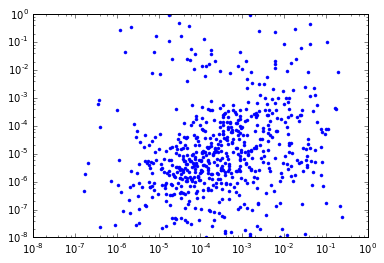

In [6]:
plt.plot(dd['q_true'],dd['q_fitted'],'b.')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-8,1)
plt.ylim(1e-8,1)

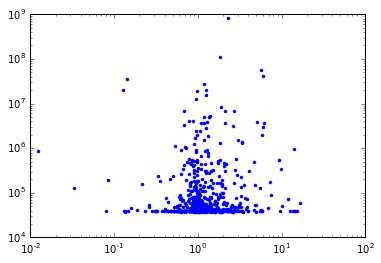

In [7]:
plt.plot(dd['s_true'],-2*dd['chi_2_2'],'b.')
plt.xscale('log')
plt.yscale('log')
#plt.xlim(1e-8,1)
#plt.ylim(1e-8,1)

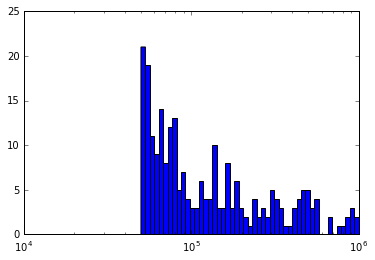

In [16]:
plt.hist(-2*dd['chi_2_2'],bins= np.logspace(np.log10(5e4),np.log10(1e6),50))
plt.xscale('log')

In [14]:
min(-2*dd['chi_2_2'])

37767.6090958

In [22]:
len(dd[dd['u0_fitted']<0.045])

320